<a href="https://colab.research.google.com/github/amnasaeed1/Survival-Analysis-for-Early-Alzheimer-s-Disease-Prediction/blob/main/Survival%20Analysis%20for%20Alzheimer's%20Disease%20prediction%20in%20Early%20MCI%20individuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Install scikit-survival
!pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install scipy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [ ]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=274136e263784e07cf314098e5649cd0144619b90dc9839a2a1861656e25a2ba
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=7d2ddf557874225be47f4d4ce2f5f2fbf584c46ebae85752507b812d8656c863
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=e6222d1ac69660d720e32723a1087f8a381ad43e77f4698fe7c2fb3e5178931b
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
#Uploading CSF dataset
from google.colab import files
uploaded = files.upload()
import pandas as pd
df1 = pd.read_csv('CSFDataset.csv')
# Display the first few rows of the DataFrame
df1.head()

Saving CSFDataset.csv to CSFDataset.csv


RID VISCODE VISCODE2  PHASE        BATCH            KIT             STDS  \
0    3      bl       bl  ADNI1  UPENNBIOMK9  P06-MP02-MP01  P06-MP02-MP01/2   
1    3     m12      m12  ADNI1  UPENNBIOMK9  P06-MP02-MP01  P06-MP02-MP01/2   
2    4      bl       bl  ADNI1  UPENNBIOMK9  P06-MP02-MP01  P06-MP02-MP01/2   
3    4     m12      m12  ADNI1  UPENNBIOMK9  P06-MP02-MP01  P06-MP02-MP01/2   
4    5     m12      m12  ADNI1  UPENNBIOMK9  P06-MP02-MP01  P06-MP02-MP01/2   

      RUNDATE  ABETA    TAU   PTAU update_stamp  
0  12/14/2016  741.5  239.7  22.83      41:20.0  
1  12/14/2016  601.4  251.7  24.18      41:20.0  
2    1/9/2017   1501  153.1  13.29      41:20.0  
3    1/9/2017   1176  159.7   13.3      41:20.0  
4  11/22/2016  472.8  334.1  34.04      41:20.0

In [ ]:
import warnings
warnings.simplefilter('ignore')


In [ ]:
# Drop  unecessary columns
columns_to_drop = ['BATCH', 'KIT', 'STDS', 'RUNDATE', 'update_stamp']
df1.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Filter rows where 'VISCODE2' is equal to 'bl'
df = df1[df1['VISCODE2'] == 'bl']
df.head(10)

RID VISCODE VISCODE2  PHASE  ABETA    TAU   PTAU
0     3      bl       bl  ADNI1  741.5  239.7  22.83
2     4      bl       bl  ADNI1   1501  153.1  13.29
5     5      bl       bl  ADNI1  547.3    337  33.43
6     8      bl       bl  ADNI1  >1700  440.2  37.51
8    10      bl       bl  ADNI1  357.4  329.9  31.26
10   14      bl       bl  ADNI1   1582  203.6  16.68
12   16      bl       bl  ADNI1  550.6  170.5  15.88
13   19      bl       bl  ADNI1  >1700  213.7  18.05
15   22      bl       bl  ADNI1  >1700  264.7  21.85
17   23      bl       bl  ADNI1   1647  181.1  16.74

In [ ]:
#Uploading the dataset with neuroimaging & cognitive tests
uploaded = files.upload()
df2 = pd.read_csv('ADNI-Data.csv')
# Display the first few rows of the DataFrame
df2.head()

Saving ADNI-Data.csv to ADNI-Data.csv


RID        PTID VISCODE   EXAMDATE    Years.bl DX.bl DX.Conv   AGE  \
0    2  011_S_0002      bl   9/8/2005  8.52019165    CN     MCI  74.3   
1    2  011_S_0002     m06   3/6/2006         NaN    CN       0  74.3   
2    2  011_S_0002     m36  8/27/2008         NaN    CN       0  74.3   
3    2  011_S_0002     m60  9/22/2010         NaN    CN       0  74.3   
4    2  011_S_0002     m66   3/4/2011         NaN    CN       0  74.3   

  PTGENDER  PTEDUCAT  PTMARRY  APOE4       FDG  CDRSB  ADAS11  ADAS13  MMSE  \
0     Male        16  Married    0.0  6.846324    0.0   10.67   18.67  28.0   
1     Male        16  Married    0.0  6.082729    0.0   10.67   19.67  28.0   
2     Male        16  Married    0.0       NaN    0.0   12.00   20.00  29.0   
3     Male        16  Married    0.0       NaN    0.0   14.00   23.00  28.0   
4     Male        16  Married    0.0       NaN    NaN     NaN     NaN   NaN   

   RAVLT.immediate  RAVLT.learning  RAVLT.forgetting  RAVLT.perc.forgetting  \
0             44.0             4.0               6.0              54.545455   
1             40.0             3.0               3.0              37.500000   
2             34.0             2.0               7.0              87.500000   
3             37.0             5.0               4.0              40.000000   
4              NaN             NaN               NaN                    NaN   

   FAQ  Ventricles  Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp  \
0  0.0    118233.0       8336.0   1229738.0      4177.0   16559.0  27936.0   
1  0.0         NaN          NaN         NaN         NaN       NaN      NaN   
2  0.0         NaN          NaN         NaN         NaN       NaN      NaN   
3  0.0         NaN          NaN         NaN         NaN       NaN      NaN   
4  NaN         NaN          NaN         NaN         NaN       NaN      NaN   

           ICV  Month  
0  1984657.197  102.0  
1          NaN    NaN  
2          NaN    NaN  
3          NaN    NaN  
4          NaN    NaN

Merging both datasets to combine features

In [ ]:
#Merging CSF dataset with main dataset
merged_df = pd.merge(df2, df, on='RID', how='left', suffixes=('_df2', '_df'))
columns_to_drop = ['VISCODE_df',	'VISCODE2','PHASE']
merged_df.drop(columns=columns_to_drop, inplace=True)
merged_df.rename(columns={'VISCODE_df2': 'VISCODE'}, inplace=True)
df = merged_df.copy()
df.head()

RID        PTID VISCODE   EXAMDATE    Years.bl DX.bl DX.Conv   AGE  \
0    2  011_S_0002      bl   9/8/2005  8.52019165    CN     MCI  74.3   
1    2  011_S_0002     m06   3/6/2006         NaN    CN       0  74.3   
2    2  011_S_0002     m36  8/27/2008         NaN    CN       0  74.3   
3    2  011_S_0002     m60  9/22/2010         NaN    CN       0  74.3   
4    2  011_S_0002     m66   3/4/2011         NaN    CN       0  74.3   

  PTGENDER  PTEDUCAT  PTMARRY  APOE4       FDG  CDRSB  ADAS11  ADAS13  MMSE  \
0     Male        16  Married    0.0  6.846324    0.0   10.67   18.67  28.0   
1     Male        16  Married    0.0  6.082729    0.0   10.67   19.67  28.0   
2     Male        16  Married    0.0       NaN    0.0   12.00   20.00  29.0   
3     Male        16  Married    0.0       NaN    0.0   14.00   23.00  28.0   
4     Male        16  Married    0.0       NaN    NaN     NaN     NaN   NaN   

   RAVLT.immediate  RAVLT.learning  RAVLT.forgetting  RAVLT.perc.forgetting  \
0             44.0             4.0               6.0              54.545455   
1             40.0             3.0               3.0              37.500000   
2             34.0             2.0               7.0              87.500000   
3             37.0             5.0               4.0              40.000000   
4              NaN             NaN               NaN                    NaN   

   FAQ  Ventricles  Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp  \
0  0.0    118233.0       8336.0   1229738.0      4177.0   16559.0  27936.0   
1  0.0         NaN          NaN         NaN         NaN       NaN      NaN   
2  0.0         NaN          NaN         NaN         NaN       NaN      NaN   
3  0.0         NaN          NaN         NaN         NaN       NaN      NaN   
4  NaN         NaN          NaN         NaN         NaN       NaN      NaN   

           ICV  Month ABETA  TAU PTAU  
0  1984657.197  102.0   NaN  NaN  NaN  
1          NaN    NaN   NaN  NaN  NaN  
2          NaN    NaN   NaN  NaN  NaN  
3          NaN    NaN   NaN  NaN  NaN  
4          NaN    NaN   NaN  NaN  NaN

In [ ]:
column_names = list(df.columns)
print(column_names)

['RID', 'PTID', 'VISCODE', 'EXAMDATE', 'Years.bl', 'DX.bl', 'DX.Conv', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTMARRY', 'APOE4', 'FDG', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT.immediate', 'RAVLT.learning', 'RAVLT.forgetting', 'RAVLT.perc.forgetting', 'FAQ', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'Month', 'ABETA', 'TAU', 'PTAU']


In [ ]:
#to rename data 'merged_df' to 'df'
df = merged_df.copy()

Preprocessing to extract relevant features

In [ ]:
# Replace 'NL' and 'SMC' with 'CN' in the entire DataFrame
df.replace(['NL', 'SMC'], 'CN', inplace=True)

In [ ]:
df.replace({'Dementia': 'AD'}, inplace=True)

In [ ]:
df.replace({'MCI to Dementia': 'AD',
                        'MCI to NL': 'CN',
                        'NL to Dementia': 'AD',
                        'NL to MCI': 'MCI',
                        'Dementia to MCI': 'MCI'}, inplace=True)

In [ ]:
# Remove rows where 'VISCODE' is not equal to 'bl'
df = df[df['VISCODE'] == 'bl']
df.head(10)

RID        PTID VISCODE    EXAMDATE     Years.bl DX.bl DX.Conv   AGE  \
0     2  011_S_0002      bl    9/8/2005   8.52019165    CN     MCI  74.3   
11    3  011_S_0003      bl   9/12/2005  1.998631075    AD      AD  81.3   
16    4  022_S_0004      bl   11/8/2005  3.028062971  LMCI     MCI  67.5   
22    5  011_S_0005      bl    9/7/2005  3.008898015    CN      CN  73.7   
29    6  100_S_0006      bl  11/29/2005   3.02532512  LMCI     MCI  80.4   
36    7  022_S_0007      bl   10/6/2005  2.006844627    AD      AD  75.4   
41    8  011_S_0008      bl   9/19/2005  8.498288843    CN      CN  84.5   
54   10  011_S_0010      bl  11/10/2005  1.990417522    AD      AD  73.9   
59   14  022_S_0014      bl   11/4/2005  3.003422313    CN      CN  78.5   
65   15  100_S_0015      bl  10/18/2005  6.042436687    CN     MCI  80.8   

   PTGENDER  PTEDUCAT   PTMARRY  APOE4       FDG  CDRSB  ADAS11  ADAS13  MMSE  \
0      Male        16   Married    0.0  6.846324    0.0   10.67   18.67  28.0   
11     Male        18   Married    1.0  5.453963    4.5   22.00   31.00  20.0   
16     Male        10   Married    0.0       NaN    1.0   14.33   21.33  27.0   
22     Male        16   Married    0.0  6.489950    0.0    8.67   14.67  29.0   
29   Female        13   Married    0.0       NaN    0.5   18.67   25.67  25.0   
36     Male        10   Married    1.0       NaN    6.0   27.33   40.33  20.0   
41   Female        18   Widowed    0.0  6.381389    0.0    5.00    7.00  28.0   
54   Female        12   Married    1.0  5.594070    5.0   12.33   24.33  24.0   
59   Female        12  Divorced    0.0  6.284963    0.0    4.33    8.33  29.0   
65     Male        18   Married    1.0       NaN    0.0    7.00    9.00  29.0   

    RAVLT.immediate  RAVLT.learning  RAVLT.forgetting  RAVLT.perc.forgetting  \
0              44.0             4.0               6.0              54.545455   
11             22.0             1.0               4.0             100.000000   
16             37.0             7.0               4.0              36.363636   
22             37.0             4.0               4.0              44.444444   
29             30.0             1.0               5.0              83.333333   
36             17.0             2.0               3.0              75.000000   
41             51.0             7.0               3.0              25.000000   
54             20.0             2.0               5.0             100.000000   
59             45.0             6.0               4.0              36.363636   
65             50.0             5.0               3.0              25.000000   

     FAQ  Ventricles  Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp  \
0    0.0    118233.0       8336.0   1229738.0      4177.0   16559.0  27936.0   
11  10.0     84599.0       5319.0   1129834.0      1791.0   15506.0  18422.0   
16   0.0     39605.0       6869.0   1154980.0      3983.0   19036.0  19615.0   
22   0.0     34062.0       7075.0   1116633.0      4433.0   24788.0  21614.0   
29   0.0     39826.0       5348.0    927510.0      2277.0   17963.0  17802.0   
36  17.0     25704.0       6729.0    875798.0      2050.0   12063.0  15374.0   
41   0.0     18757.0       6080.0    948684.0      4190.0   14043.0  20076.0   
54  11.0     26820.0       5485.0   1033542.0      2676.0   16761.0  19741.0   
59   0.0     46279.0       6730.0    861749.0      3581.0   13779.0  17798.0   
65   0.0     33420.0       6732.0    942730.0      4307.0   14953.0  17273.0   

            ICV  Month  ABETA    TAU   PTAU  
0   1984657.197  102.0    NaN    NaN    NaN  
11  1920690.745   24.0  741.5  239.7  22.83  
16  1679444.575   36.0   1501  153.1  13.29  
22  1640766.112   36.0  547.3    337  33.43  
29  1485833.989    0.0    NaN    NaN    NaN  
36  1353519.265   24.0    NaN    NaN    NaN  
41  1396068.139  102.0  >1700  440.2  37.51  
54  1471183.773   24.0  357.4  329.9  31.26  
59  1269537.563   36.0   1582  203.6  16.68  
65  1500995.196   72.0    NaN    NaN    NaN

In [ ]:
df['VISCODE'].value_counts()

VISCODE
bl    1735
Name: count, dtype: int64

In [ ]:
# Create a dictionary to map the conditions to labels
conditions = {
    ('EMCI', 'AD'): 1,
    ('EMCI', 'MCI'): 2,
    ('LMCI', 'AD'): 3,
    ('LMCI', 'MCI'): 4,
    ('CN', 'CN'): 5,
    ('AD', 'AD'): 6,
    ('CN', 'MCI'): 7,
    ('CN', 'AD'): 8,
    ('EMCI', 'CN'): 9,
    ('LMCI', 'CN'): 10,
    ('AD', 'MCI'): 11
}

df.loc[:, 'DX.groups'] = df.apply(lambda row: conditions.get((row['DX.bl'], row['DX.Conv']), None), axis=1)


In [ ]:
# Assuming your DataFrame is named 'df'
print(df[['DX.bl','DX.Conv', 'DX.groups', 'Years.bl']])


      DX.bl DX.Conv  DX.groups     Years.bl
0        CN     MCI        7.0   8.52019165
11       AD      AD        6.0  1.998631075
16     LMCI     MCI        4.0  3.028062971
22       CN      CN        5.0  3.008898015
29     LMCI     MCI        4.0   3.02532512
...     ...     ...        ...          ...
11140    CN      CN        5.0          NaN
11142    CN      CN        5.0          NaN
11144    CN      CN        5.0  0.177960301
11145    CN      CN        5.0          NaN
11147    CN      CN        5.0          NaN

[1735 rows x 4 columns]


In [ ]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display the result
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 RID                        0
PTID                       0
VISCODE                    0
EXAMDATE                   0
Years.bl                  56
DX.bl                      0
DX.Conv                    0
AGE                        0
PTGENDER                   0
PTEDUCAT                   0
PTMARRY                    0
APOE4                    169
FDG                      435
CDRSB                      0
ADAS11                     6
ADAS13                    15
MMSE                       0
RAVLT.immediate            7
RAVLT.learning             7
RAVLT.forgetting           7
RAVLT.perc.forgetting     12
FAQ                        9
Ventricles               278
Hippocampus              278
WholeBrain               280
Entorhinal               278
Fusiform                 278
MidTemp                  278
ICV                       26
Month                     44
ABETA                    520
TAU                      520
PTAU                     520
DX.groups  

In [ ]:
df.head()

RID        PTID VISCODE    EXAMDATE     Years.bl DX.bl DX.Conv   AGE  \
0     2  011_S_0002      bl    9/8/2005   8.52019165    CN     MCI  74.3   
11    3  011_S_0003      bl   9/12/2005  1.998631075    AD      AD  81.3   
16    4  022_S_0004      bl   11/8/2005  3.028062971  LMCI     MCI  67.5   
22    5  011_S_0005      bl    9/7/2005  3.008898015    CN      CN  73.7   
29    6  100_S_0006      bl  11/29/2005   3.02532512  LMCI     MCI  80.4   

   PTGENDER  PTEDUCAT  PTMARRY  APOE4       FDG  CDRSB  ADAS11  ADAS13  MMSE  \
0      Male        16  Married    0.0  6.846324    0.0   10.67   18.67  28.0   
11     Male        18  Married    1.0  5.453963    4.5   22.00   31.00  20.0   
16     Male        10  Married    0.0       NaN    1.0   14.33   21.33  27.0   
22     Male        16  Married    0.0  6.489950    0.0    8.67   14.67  29.0   
29   Female        13  Married    0.0       NaN    0.5   18.67   25.67  25.0   

    RAVLT.immediate  RAVLT.learning  RAVLT.forgetting  RAVLT.perc.forgetting  \
0              44.0             4.0               6.0              54.545455   
11             22.0             1.0               4.0             100.000000   
16             37.0             7.0               4.0              36.363636   
22             37.0             4.0               4.0              44.444444   
29             30.0             1.0               5.0              83.333333   

     FAQ  Ventricles  Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp  \
0    0.0    118233.0       8336.0   1229738.0      4177.0   16559.0  27936.0   
11  10.0     84599.0       5319.0   1129834.0      1791.0   15506.0  18422.0   
16   0.0     39605.0       6869.0   1154980.0      3983.0   19036.0  19615.0   
22   0.0     34062.0       7075.0   1116633.0      4433.0   24788.0  21614.0   
29   0.0     39826.0       5348.0    927510.0      2277.0   17963.0  17802.0   

            ICV  Month  ABETA    TAU   PTAU  DX.groups  
0   1984657.197  102.0    NaN    NaN    NaN        7.0  
11  1920690.745   24.0  741.5  239.7  22.83        6.0  
16  1679444.575   36.0   1501  153.1  13.29        4.0  
22  1640766.112   36.0  547.3    337  33.43        5.0  
29  1485833.989    0.0    NaN    NaN    NaN        4.0

In [ ]:
# Select rows with 'EMCI' or 'LMCI' in the 'DX.bl' column
selected_rows = df[df['DX.bl'].isin(['EMCI', 'LMCI'])]

# Update the original DataFrame to only include selected rows
df = selected_rows.copy()
df.head()

RID        PTID VISCODE    EXAMDATE     Years.bl DX.bl DX.Conv   AGE  \
16     4  022_S_0004      bl   11/8/2005  3.028062971  LMCI     MCI  67.5   
29     6  100_S_0006      bl  11/29/2005   3.02532512  LMCI     MCI  80.4   
127   30  023_S_0030      bl  10/20/2005  0.479123888  LMCI      AD  80.0   
151   33  035_S_0033      bl   12/9/2005  3.085557837  LMCI     MCI  83.3   
169   38  067_S_0038      bl  12/15/2005  0.977412731  LMCI     MCI  76.8   

    PTGENDER  PTEDUCAT  PTMARRY  APOE4       FDG  CDRSB  ADAS11  ADAS13  MMSE  \
16      Male        10  Married    0.0       NaN    1.0   14.33   21.33  27.0   
29    Female        13  Married    0.0       NaN    0.5   18.67   25.67  25.0   
127   Female        19  Married    0.0       NaN    1.0   10.00   22.00  29.0   
151     Male        20  Married    0.0  5.528338    2.0   17.67   25.67  29.0   
169     Male        12  Married    0.0       NaN    1.0   11.33   16.33  25.0   

     RAVLT.immediate  RAVLT.learning  RAVLT.forgetting  RAVLT.perc.forgetting  \
16              37.0             7.0               4.0              36.363636   
29              30.0             1.0               5.0              83.333333   
127             36.0             6.0              10.0              90.909091   
151             21.0             4.0               6.0             100.000000   
169             27.0             2.0               1.0              16.666667   

     FAQ  Ventricles  Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp  \
16   0.0     39605.0       6869.0   1154980.0      3983.0   19036.0  19615.0   
29   0.0     39826.0       5348.0    927510.0      2277.0   17963.0  17802.0   
127  6.0         NaN          NaN         NaN         NaN       NaN      NaN   
151  6.0         NaN          NaN         NaN         NaN       NaN      NaN   
169  1.0     29502.0       8154.0    977778.0      4381.0   14579.0  20174.0   

             ICV  Month  ABETA    TAU   PTAU  DX.groups  
16   1679444.575   36.0   1501  153.1  13.29        4.0  
29   1485833.989    0.0    NaN    NaN    NaN        4.0  
127  1588238.523    6.0    NaN    NaN    NaN        3.0  
151  1735514.288   36.0    673  333.7  34.93        4.0  
169  1541092.368   12.0  874.1  153.2  13.45        4.0

In [ ]:
df['DX.bl'].value_counts()

DX.bl
LMCI    562
EMCI    311
Name: count, dtype: int64

In [ ]:
df['DX.Conv'].value_counts()

DX.Conv
MCI    569
AD     268
CN      36
Name: count, dtype: int64

In [ ]:
# Remove rows where 'DX.Conv' column has the value 'CN'
df = df[df['DX.Conv'] != 'CN']

In [ ]:
df['DX.bl'].value_counts()

DX.bl
LMCI    546
EMCI    291
Name: count, dtype: int64

Defining the 'Event Column' for survival analysis, which in this case is named as 'PROGRESSION'

In [ ]:
# Define a function to assign values to 'PROGRESSION' based on 'DX.CHANGE'
def assign_progression(row):
    if row['DX.groups'] in [2,4]:
        return 0
    elif row['DX.groups'] in [1,3]:
        return 1
# Add a new 'PROGRESSION' column based on the function
df['PROGRESSION'] = df.apply(assign_progression, axis=1)

# Print the updated DataFrame with the 'PROGRESSION' column
print(df)

        RID        PTID VISCODE    EXAMDATE     Years.bl DX.bl DX.Conv   AGE  \
16        4  022_S_0004      bl   11/8/2005  3.028062971  LMCI     MCI  67.5   
29        6  100_S_0006      bl  11/29/2005   3.02532512  LMCI     MCI  80.4   
127      30  023_S_0030      bl  10/20/2005  0.479123888  LMCI      AD  80.0   
151      33  035_S_0033      bl   12/9/2005  3.085557837  LMCI     MCI  83.3   
169      38  067_S_0038      bl  12/15/2005  0.977412731  LMCI     MCI  76.8   
...     ...         ...     ...         ...          ...   ...     ...   ...   
10723  5026  041_S_5026      bl  11/30/2012  4.183436003  EMCI      AD  70.5   
10739  5031  016_S_5031      bl   4/10/2013  4.923648186  EMCI      AD  80.2   
10756  5047  114_S_5047      bl    1/2/2013  0.169746749  LMCI      AD  68.8   
10786  5066  128_S_5066      bl    2/8/2013  5.145106092  EMCI      AD  79.7   
10956  5160  067_S_5160      bl   5/30/2013     4.768011  EMCI      AD  84.1   

      PTGENDER  PTEDUCAT        PTMARRY

In [ ]:
df.head()

RID        PTID VISCODE    EXAMDATE     Years.bl DX.bl DX.Conv   AGE  \
16     4  022_S_0004      bl   11/8/2005  3.028062971  LMCI     MCI  67.5   
29     6  100_S_0006      bl  11/29/2005   3.02532512  LMCI     MCI  80.4   
127   30  023_S_0030      bl  10/20/2005  0.479123888  LMCI      AD  80.0   
151   33  035_S_0033      bl   12/9/2005  3.085557837  LMCI     MCI  83.3   
169   38  067_S_0038      bl  12/15/2005  0.977412731  LMCI     MCI  76.8   

    PTGENDER  PTEDUCAT  PTMARRY  APOE4       FDG  CDRSB  ADAS11  ADAS13  MMSE  \
16      Male        10  Married    0.0       NaN    1.0   14.33   21.33  27.0   
29    Female        13  Married    0.0       NaN    0.5   18.67   25.67  25.0   
127   Female        19  Married    0.0       NaN    1.0   10.00   22.00  29.0   
151     Male        20  Married    0.0  5.528338    2.0   17.67   25.67  29.0   
169     Male        12  Married    0.0       NaN    1.0   11.33   16.33  25.0   

     RAVLT.immediate  RAVLT.learning  RAVLT.forgetting  RAVLT.perc.forgetting  \
16              37.0             7.0               4.0              36.363636   
29              30.0             1.0               5.0              83.333333   
127             36.0             6.0              10.0              90.909091   
151             21.0             4.0               6.0             100.000000   
169             27.0             2.0               1.0              16.666667   

     FAQ  Ventricles  Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp  \
16   0.0     39605.0       6869.0   1154980.0      3983.0   19036.0  19615.0   
29   0.0     39826.0       5348.0    927510.0      2277.0   17963.0  17802.0   
127  6.0         NaN          NaN         NaN         NaN       NaN      NaN   
151  6.0         NaN          NaN         NaN         NaN       NaN      NaN   
169  1.0     29502.0       8154.0    977778.0      4381.0   14579.0  20174.0   

             ICV  Month  ABETA    TAU   PTAU  DX.groups  PROGRESSION  
16   1679444.575   36.0   1501  153.1  13.29        4.0            0  
29   1485833.989    0.0    NaN    NaN    NaN        4.0            0  
127  1588238.523    6.0    NaN    NaN    NaN        3.0            1  
151  1735514.288   36.0    673  333.7  34.93        4.0            0  
169  1541092.368   12.0  874.1  153.2  13.45        4.0            0

In [ ]:
# Calculate the total number of unique RID values
total_unique_rid = df['RID'].nunique()
print(total_unique_rid)

837


In [ ]:
df = df.drop(columns=['EXAMDATE'])

In [ ]:
# Removing special characters
df.loc[df['ABETA'] == '>1700', 'ABETA'] = 1750
df.loc[df['ABETA'] == '<200', 'ABETA'] = 150

# Removing special characters
df.loc[df['TAU'] == '>1300', 'TAU'] = 1350
df.loc[df['TAU'] == '<80', 'TAU'] = 70

# Removing special characters
df.loc[df['PTAU'] == '>120', 'PTAU'] = 130
df.loc[df['PTAU'] == '<8', 'PTAU'] = 5

In [ ]:
df['PROGRESSION'].value_counts()

PROGRESSION
0    569
1    268
Name: count, dtype: int64

In [ ]:
data_types = df.dtypes
print(data_types)

RID                        int64
PTID                      object
VISCODE                   object
Years.bl                  object
DX.bl                     object
DX.Conv                   object
AGE                      float64
PTGENDER                  object
PTEDUCAT                   int64
PTMARRY                   object
APOE4                    float64
FDG                      float64
CDRSB                    float64
ADAS11                   float64
ADAS13                   float64
MMSE                     float64
RAVLT.immediate          float64
RAVLT.learning           float64
RAVLT.forgetting         float64
RAVLT.perc.forgetting    float64
FAQ                      float64
Ventricles               float64
Hippocampus              float64
WholeBrain               float64
Entorhinal               float64
Fusiform                 float64
MidTemp                  float64
ICV                      float64
Month                    float64
ABETA                     object
TAU       

In [ ]:
df = df.drop(columns=['VISCODE', 'DX.bl', 'DX.Conv', 'Month','PTID', 'RID','PTMARRY'])

In [ ]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display the result
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Years.bl                   1
AGE                        0
PTGENDER                   0
PTEDUCAT                   0
APOE4                     13
FDG                      202
CDRSB                      0
ADAS11                     4
ADAS13                     7
MMSE                       0
RAVLT.immediate            2
RAVLT.learning             2
RAVLT.forgetting           2
RAVLT.perc.forgetting      3
FAQ                        7
Ventricles               126
Hippocampus              126
WholeBrain               126
Entorhinal               126
Fusiform                 126
MidTemp                  126
ICV                        8
ABETA                    245
TAU                      245
PTAU                     245
DX.groups                  0
PROGRESSION                0
dtype: int64


In [ ]:
# Convert specified columns to numeric
df['ABETA'] = pd.to_numeric(df['ABETA'])
df['TAU'] = pd.to_numeric(df['TAU'])
df['PTAU'] = pd.to_numeric(df['PTAU'])
df['Years.bl'] = pd.to_numeric(df['Years.bl'])

# Display the updated DataFrame
print(df)

       Years.bl   AGE PTGENDER  PTEDUCAT  APOE4       FDG  CDRSB  ADAS11  \
16     3.028063  67.5     Male        10    0.0       NaN    1.0   14.33   
29     3.025325  80.4   Female        13    0.0       NaN    0.5   18.67   
127    0.479124  80.0   Female        19    0.0       NaN    1.0   10.00   
151    3.085558  83.3     Male        20    0.0  5.528338    2.0   17.67   
169    0.977413  76.8     Male        12    0.0       NaN    1.0   11.33   
...         ...   ...      ...       ...    ...       ...    ...     ...   
10723  4.183436  70.5   Female        18    1.0  5.428299    1.5    5.00   
10739  4.923648  80.2   Female        14    NaN  5.735620    2.0    9.00   
10756  0.169747  68.8   Female        16    2.0  8.535850    1.0   10.00   
10786  5.145106  79.7     Male        17    1.0  5.801231    2.0   11.00   
10956  4.768011  84.1   Female        18    NaN  6.097099    2.0   13.00   

       ADAS13  MMSE  RAVLT.immediate  RAVLT.learning  RAVLT.forgetting  \
16      21.33

In [ ]:
data_types = df.dtypes
print(data_types)

Years.bl                 float64
AGE                      float64
PTGENDER                  object
PTEDUCAT                   int64
APOE4                    float64
FDG                      float64
CDRSB                    float64
ADAS11                   float64
ADAS13                   float64
MMSE                     float64
RAVLT.immediate          float64
RAVLT.learning           float64
RAVLT.forgetting         float64
RAVLT.perc.forgetting    float64
FAQ                      float64
Ventricles               float64
Hippocampus              float64
WholeBrain               float64
Entorhinal               float64
Fusiform                 float64
MidTemp                  float64
ICV                      float64
ABETA                    float64
TAU                      float64
PTAU                     float64
DX.groups                float64
PROGRESSION                int64
dtype: object


Numerical Variable Distributions:



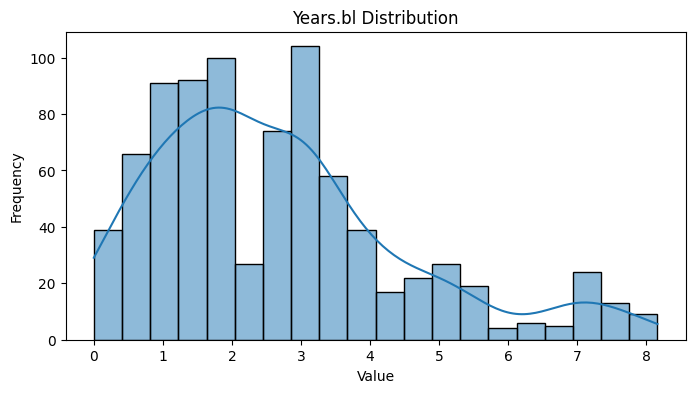

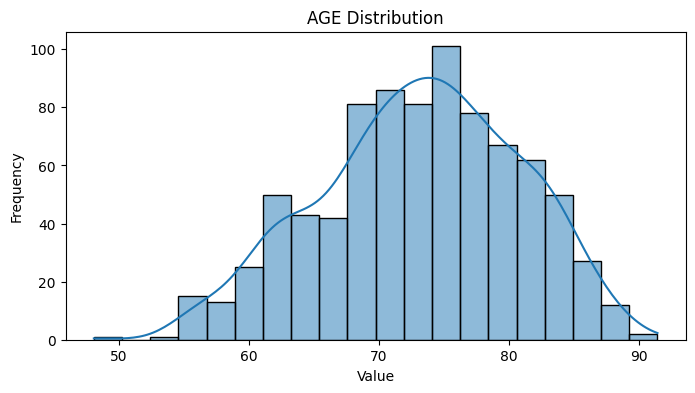

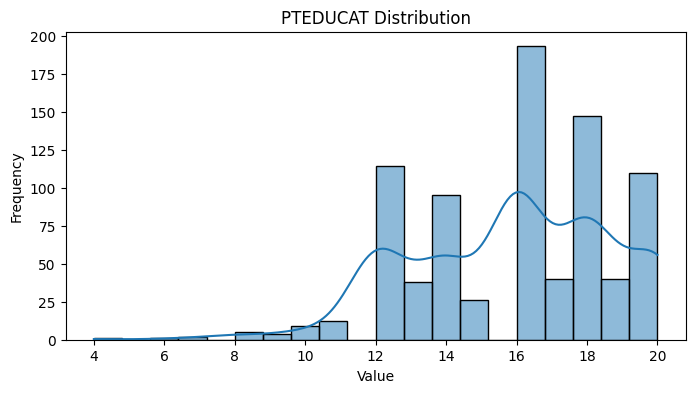

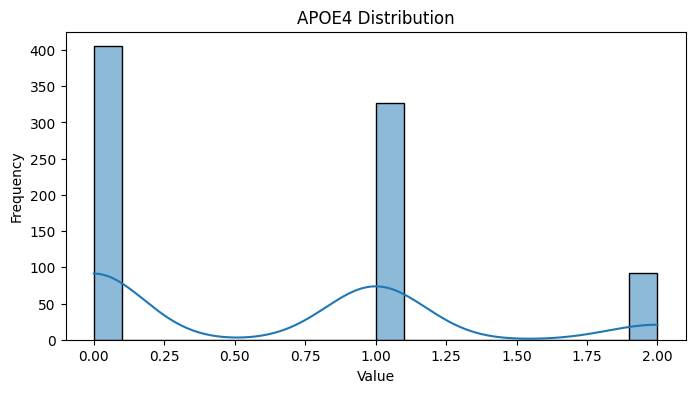

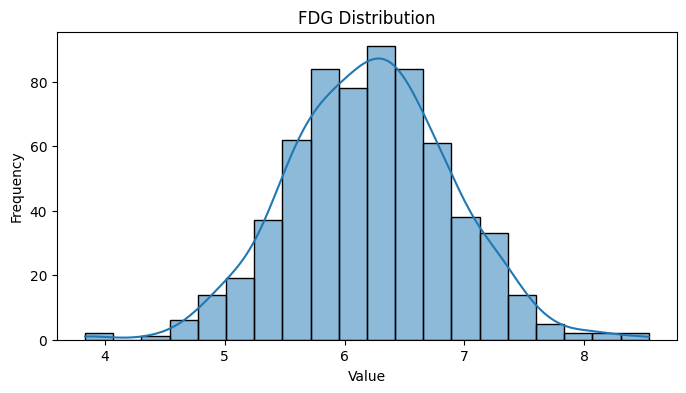

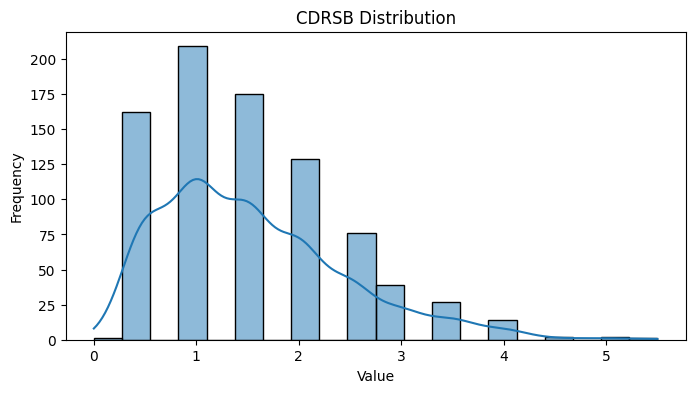

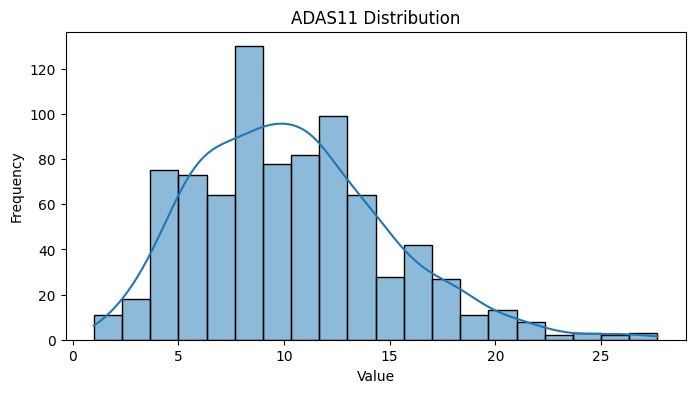

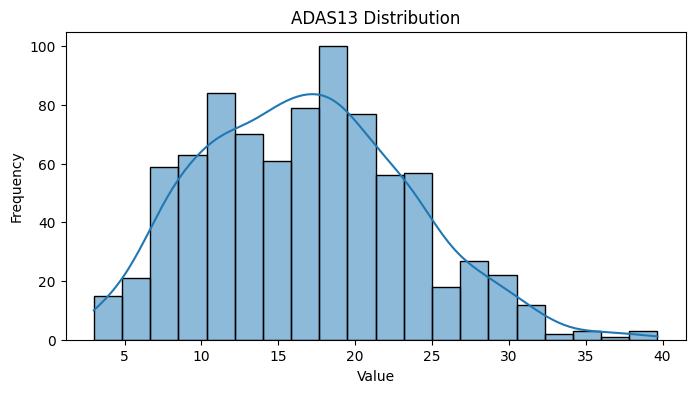

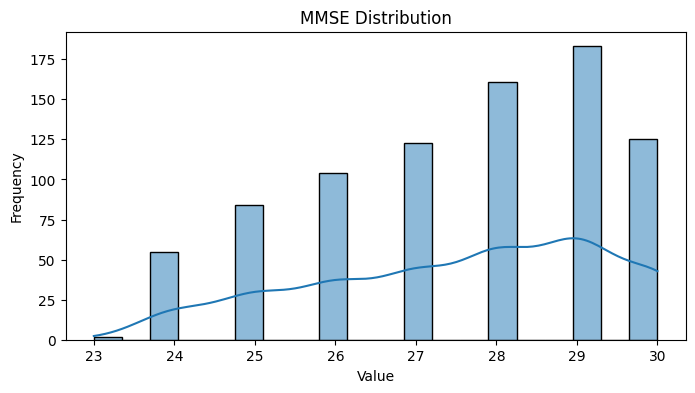

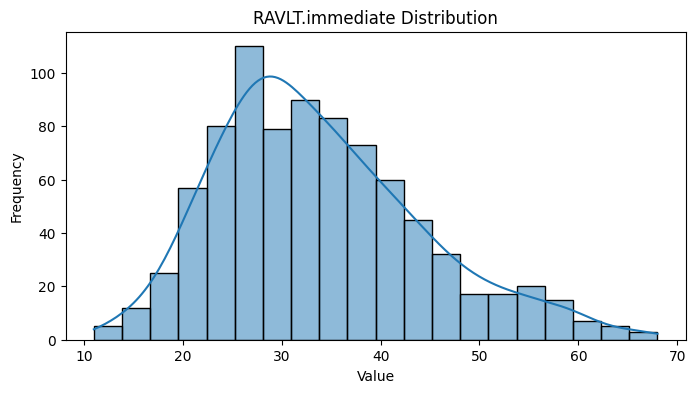

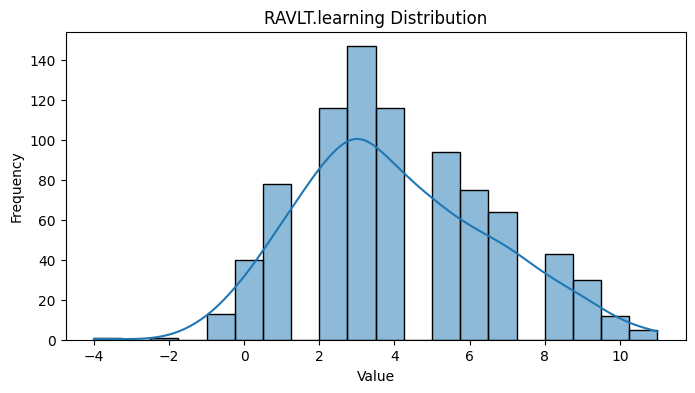

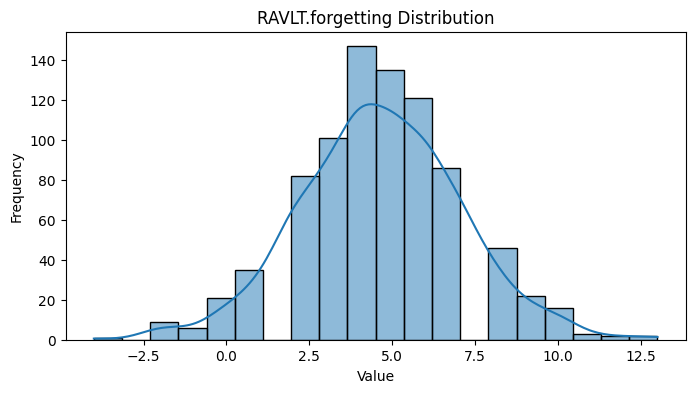

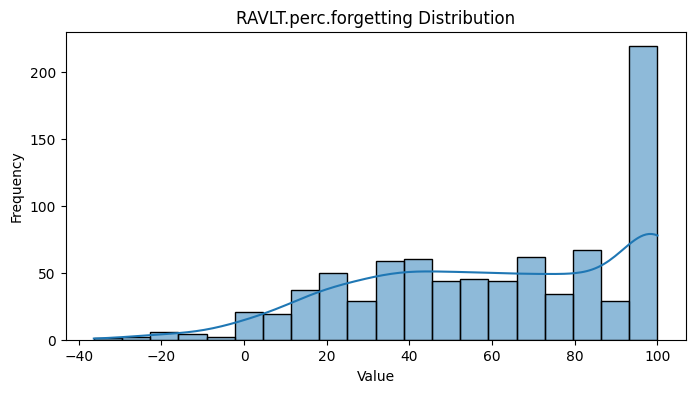

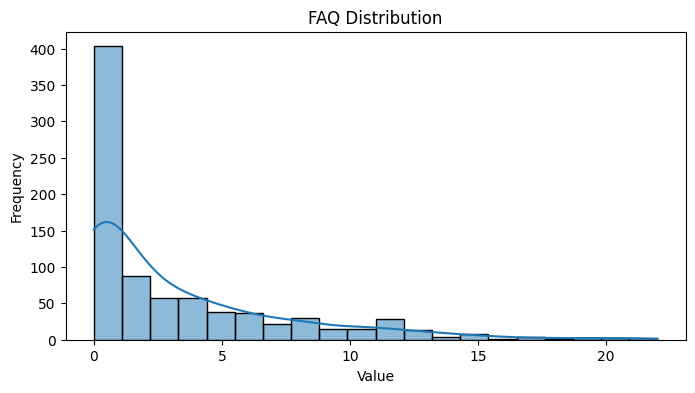

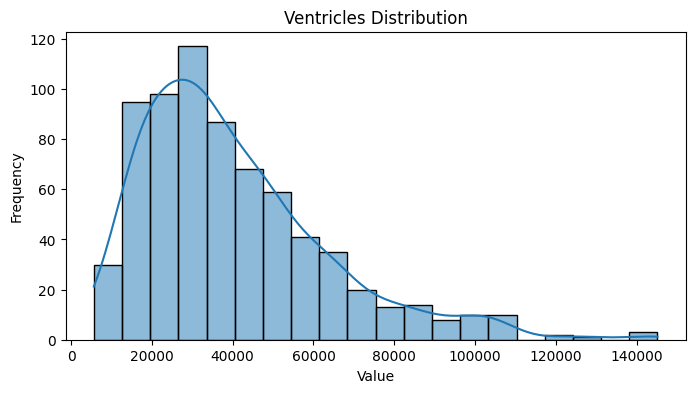

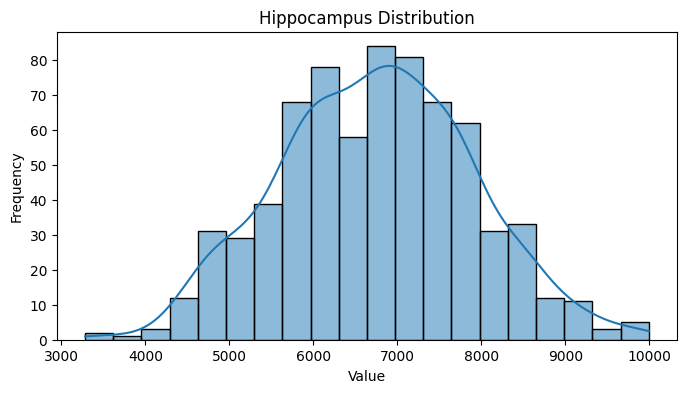

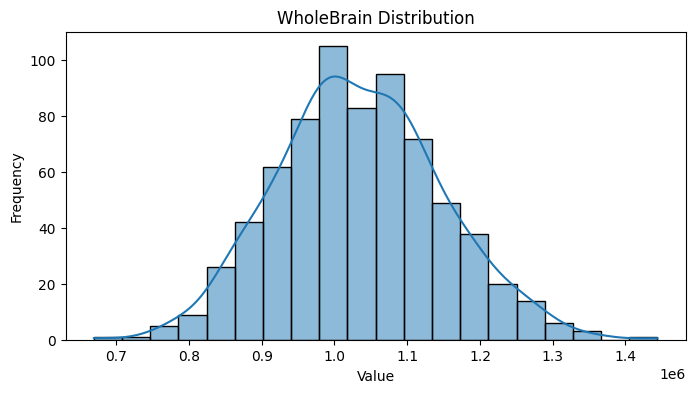

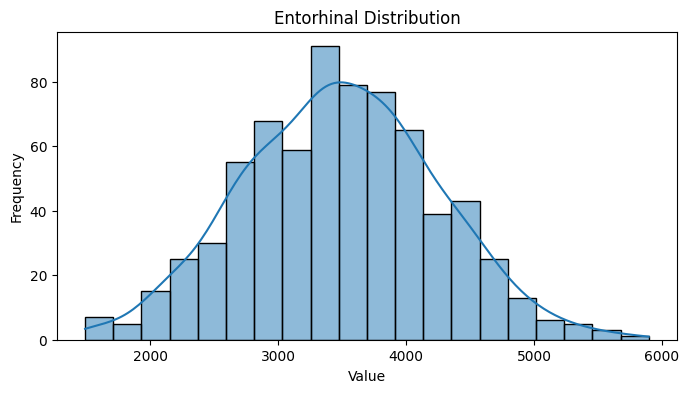

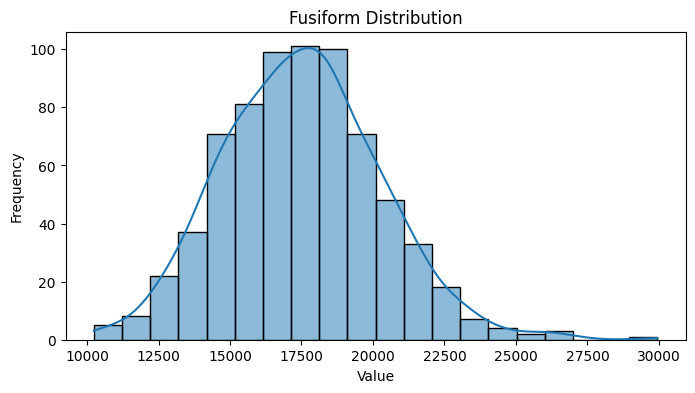

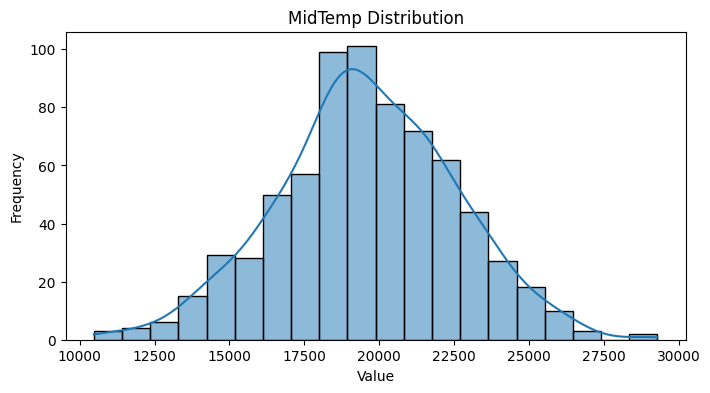

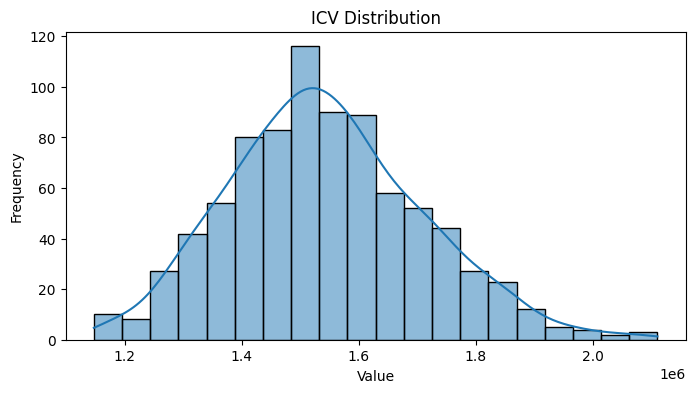

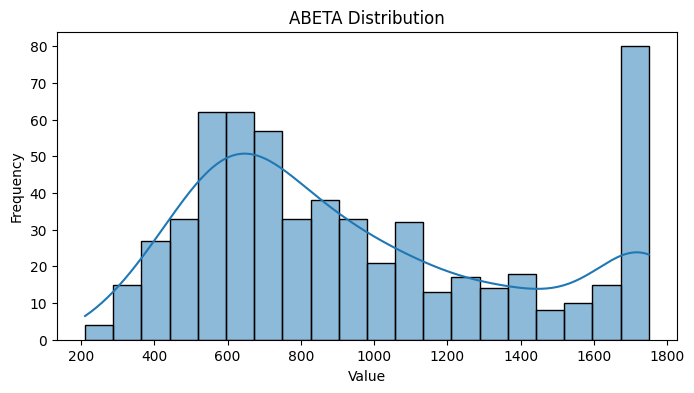

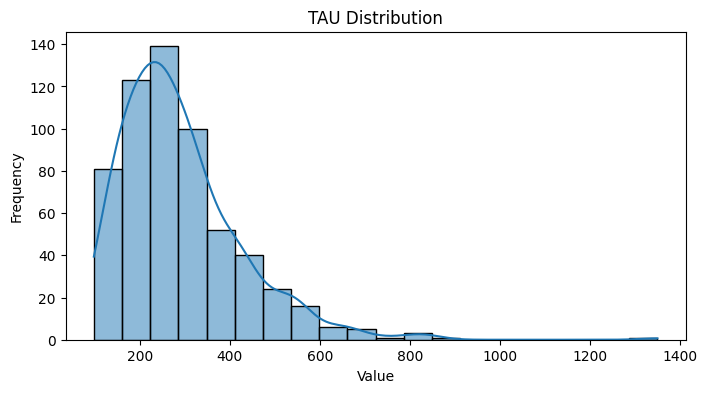

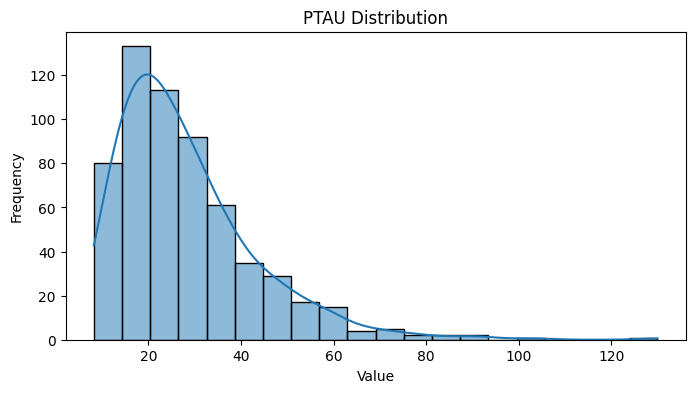

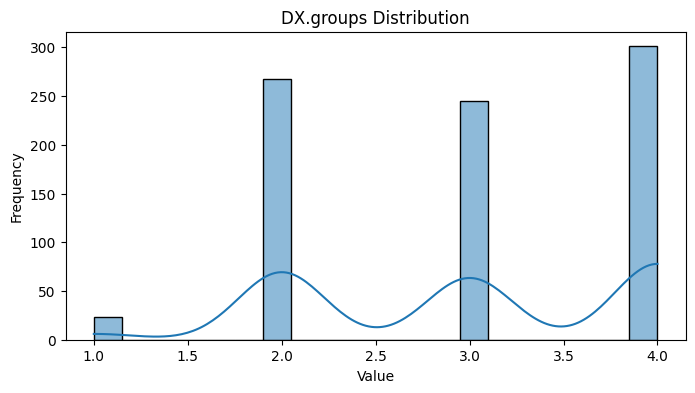

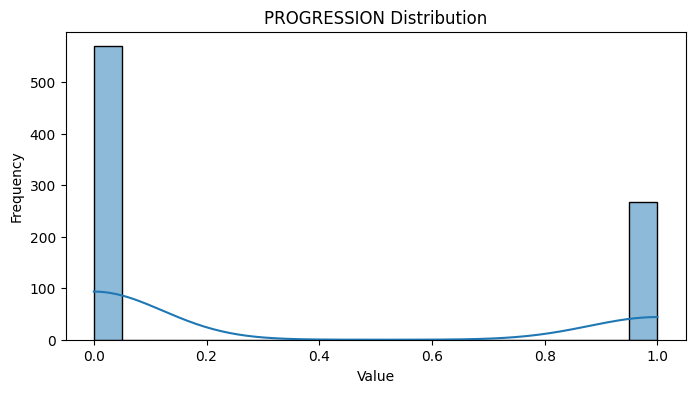

Categorical Variable Distributions:



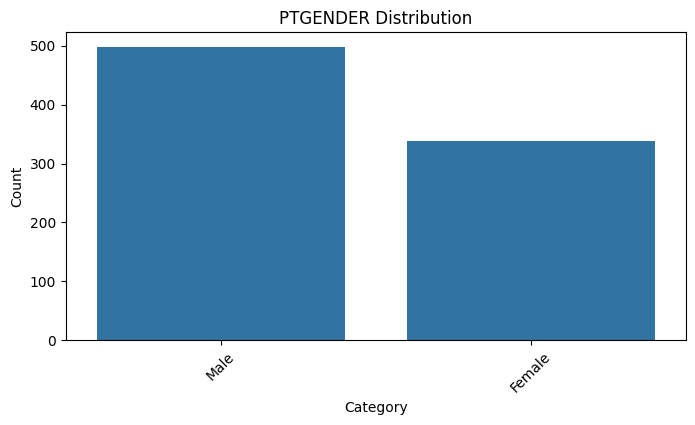

In [ ]:
# Identify numerical and categorical columns for df
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

def plot_numerical_distribution(df, numerical_columns):
    print('Numerical Variable Distributions:\n')
    for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f'{col} Distribution')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

def plot_categorical_distribution(df, categorical_columns):
    print('Categorical Variable Distributions:\n')
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.title(f'{col} Distribution')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Plotting numerical distributions for df1
plot_numerical_distribution(df, numerical_cols)

# Plotting categorical distributions for df1
plot_categorical_distribution(df, categorical_cols)

One hot encoding

In [ ]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['PTGENDER'], prefix=['PTGENDER'])

# Replace the old 'PTGENDER' column with the encoded columns
df = pd.concat([df.drop(['PTGENDER'], axis=1), df_encoded], axis=1)

In [ ]:
df.head()

Years.bl   AGE  PTEDUCAT  APOE4       FDG  CDRSB  ADAS11  ADAS13  MMSE  \
16   3.028063  67.5        10    0.0       NaN    1.0   14.33   21.33  27.0   
29   3.025325  80.4        13    0.0       NaN    0.5   18.67   25.67  25.0   
127  0.479124  80.0        19    0.0       NaN    1.0   10.00   22.00  29.0   
151  3.085558  83.3        20    0.0  5.528338    2.0   17.67   25.67  29.0   
169  0.977413  76.8        12    0.0       NaN    1.0   11.33   16.33  25.0   

     RAVLT.immediate  RAVLT.learning  RAVLT.forgetting  RAVLT.perc.forgetting  \
16              37.0             7.0               4.0              36.363636   
29              30.0             1.0               5.0              83.333333   
127             36.0             6.0              10.0              90.909091   
151             21.0             4.0               6.0             100.000000   
169             27.0             2.0               1.0              16.666667   

     FAQ  Ventricles  Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp  \
16   0.0     39605.0       6869.0   1154980.0      3983.0   19036.0  19615.0   
29   0.0     39826.0       5348.0    927510.0      2277.0   17963.0  17802.0   
127  6.0         NaN          NaN         NaN         NaN       NaN      NaN   
151  6.0         NaN          NaN         NaN         NaN       NaN      NaN   
169  1.0     29502.0       8154.0    977778.0      4381.0   14579.0  20174.0   

             ICV   ABETA    TAU   PTAU  DX.groups  PROGRESSION  Years.bl  \
16   1679444.575  1501.0  153.1  13.29        4.0            0  3.028063   
29   1485833.989     NaN    NaN    NaN        4.0            0  3.025325   
127  1588238.523     NaN    NaN    NaN        3.0            1  0.479124   
151  1735514.288   673.0  333.7  34.93        4.0            0  3.085558   
169  1541092.368   874.1  153.2  13.45        4.0            0  0.977413   

      AGE  PTEDUCAT  APOE4       FDG  CDRSB  ADAS11  ADAS13  MMSE  \
16   67.5        10    0.0       NaN    1.0   14.33   21.33  27.0   
29   80.4        13    0.0       NaN    0.5   18.67   25.67  25.0   
127  80.0        19    0.0       NaN    1.0   10.00   22.00  29.0   
151  83.3        20    0.0  5.528338    2.0   17.67   25.67  29.0   
169  76.8        12    0.0       NaN    1.0   11.33   16.33  25.0   

     RAVLT.immediate  RAVLT.learning  RAVLT.forgetting  RAVLT.perc.forgetting  \
16              37.0             7.0               4.0              36.363636   
29              30.0             1.0               5.0              83.333333   
127             36.0             6.0              10.0              90.909091   
151             21.0             4.0               6.0             100.000000   
169             27.0             2.0               1.0              16.666667   

     FAQ  Ventricles  Hippocampus  WholeBrain  Entorhinal  Fusiform  MidTemp  \
16   0.0     39605.0       6869.0   1154980.0      3983.0   19036.0  19615.0   
29   0.0     39826.0       5348.0    927510.0      2277.0   17963.0  17802.0   
127  6.0         NaN          NaN         NaN         NaN       NaN      NaN   
151  6.0         NaN          NaN         NaN         NaN       NaN      NaN   
169  1.0     29502.0       8154.0    977778.0      4381.0   14579.0  20174.0   

             ICV   ABETA    TAU   PTAU  DX.groups  PROGRESSION  \
16   1679444.575  1501.0  153.1  13.29        4.0            0   
29   1485833.989     NaN    NaN    NaN        4.0            0   
127  1588238.523     NaN    NaN    NaN        3.0            1   
151  1735514.288   673.0  333.7  34.93        4.0            0   
169  1541092.368   874.1  153.2  13.45        4.0            0   

     PTGENDER_Female  PTGENDER_Male  
16             False           True  
29              True          False  
127             True          False  
151            False           True  
169            False           True

In [ ]:
data_types = df.dtypes
print(data_types)

Years.bl           float64
AGE                float64
PTEDUCAT             int64
APOE4              float64
FDG                float64
                    ...   
PTAU               float64
DX.groups          float64
PROGRESSION          int64
PTGENDER_Female       bool
PTGENDER_Male         bool
Length: 54, dtype: object


Standardization of Features other than the Volumetric biomarkers & categorical

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of columns to standardize
cols_to_standardize = [col for col in df.columns if col not in ['Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'Years.bl', 'DX.groups', 'PROGRESSION']]

# Standardize columns
scaler = StandardScaler()
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])



print(df)

       Years.bl       AGE  PTEDUCAT     APOE4       FDG     CDRSB    ADAS11  \
16     3.028063 -0.737023 -2.049659 -0.915484       NaN -0.610603  0.864120   
29     3.025325  0.956499 -1.001025 -0.915484       NaN -1.171608  1.820672   
127    0.479124  0.903986  1.096242 -0.915484       NaN -0.610603 -0.090228   
151    3.085558  1.337213  1.445786 -0.915484 -1.031137  0.511405  1.600268   
169    0.977413  0.483888 -1.350570 -0.915484       NaN -0.610603  0.202909   
...         ...       ...       ...       ...       ...       ...       ...   
10723  4.183436 -0.343181  0.746697  0.560756 -1.180955 -0.049599 -1.192246   
10739  4.923648  0.930242 -0.651481       NaN -0.720712  0.511405 -0.310632   
10756  0.169747 -0.566358  0.047608  2.036997  3.472901 -0.610603 -0.090228   
10786  5.145106  0.864602  0.397153  0.560756 -0.622452  0.511405  0.130176   
10956  4.768011  1.442237  0.746697       NaN -0.179363  0.511405  0.570983   

         ADAS13      MMSE  RAVLT.immediate  RAVLT.l

In [ ]:
# Drop duplicate columns
df = df.loc[:,~df.columns.duplicated()]

print(df)

       Years.bl       AGE  PTEDUCAT     APOE4       FDG     CDRSB    ADAS11  \
16     3.028063 -0.737023 -2.049659 -0.915484       NaN -0.610603  0.864120   
29     3.025325  0.956499 -1.001025 -0.915484       NaN -1.171608  1.820672   
127    0.479124  0.903986  1.096242 -0.915484       NaN -0.610603 -0.090228   
151    3.085558  1.337213  1.445786 -0.915484 -1.031137  0.511405  1.600268   
169    0.977413  0.483888 -1.350570 -0.915484       NaN -0.610603  0.202909   
...         ...       ...       ...       ...       ...       ...       ...   
10723  4.183436 -0.343181  0.746697  0.560756 -1.180955 -0.049599 -1.192246   
10739  4.923648  0.930242 -0.651481       NaN -0.720712  0.511405 -0.310632   
10756  0.169747 -0.566358  0.047608  2.036997  3.472901 -0.610603 -0.090228   
10786  5.145106  0.864602  0.397153  0.560756 -0.622452  0.511405  0.130176   
10956  4.768011  1.442237  0.746697       NaN -0.179363  0.511405  0.570983   

         ADAS13      MMSE  RAVLT.immediate  RAVLT.l

In [ ]:
# Code to print the names of all columns in a DataFrame df
column_names = df.columns.tolist()
print(column_names)

['Years.bl', 'AGE', 'PTEDUCAT', 'APOE4', 'FDG', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT.immediate', 'RAVLT.learning', 'RAVLT.forgetting', 'RAVLT.perc.forgetting', 'FAQ', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'ABETA', 'TAU', 'PTAU', 'DX.groups', 'PROGRESSION', 'PTGENDER_Female', 'PTGENDER_Male']


Volumetric Biomarkers will be scaled by divind each patients biomarkers with their respective ICV as skull size of every person varies

In [ ]:
# Columns to exclude
exclude_columns = ['Years.bl', 'DX.groups', 'PROGRESSION', 'AGE', 'PTEDUCAT', 'APOE4', 'FDG', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT.immediate', 'RAVLT.learning', 'RAVLT.forgetting', 'RAVLT.perc.forgetting', 'FAQ', 'ABETA', 'TAU', 'PTAU', 'PTGENDER_Female', 'PTGENDER_Male']

# Separate excluded columns and the columns for preprocessing
df_excluded = df[exclude_columns]
df_to_preprocess = df.drop(columns=exclude_columns)

# Columns to preprocess
preprocess_columns = ['Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp', 'ICV']

# Divide selected columns by 'ICV'
df_preprocessed = df_to_preprocess.copy()
df_preprocessed[preprocess_columns] = df_to_preprocess[preprocess_columns].div(df_to_preprocess['ICV'], axis=0)

# Concatenate excluded columns with the preprocessed DataFrame
df_final = pd.concat([df_excluded, df_preprocessed], axis=1)

# Display the final DataFrame
print(df_final)

       Years.bl  DX.groups  PROGRESSION       AGE  PTEDUCAT     APOE4  \
16     3.028063        4.0            0 -0.737023 -2.049659 -0.915484   
29     3.025325        4.0            0  0.956499 -1.001025 -0.915484   
127    0.479124        3.0            1  0.903986  1.096242 -0.915484   
151    3.085558        4.0            0  1.337213  1.445786 -0.915484   
169    0.977413        4.0            0  0.483888 -1.350570 -0.915484   
...         ...        ...          ...       ...       ...       ...   
10723  4.183436        1.0            1 -0.343181  0.746697  0.560756   
10739  4.923648        1.0            1  0.930242 -0.651481       NaN   
10756  0.169747        3.0            1 -0.566358  0.047608  2.036997   
10786  5.145106        1.0            1  0.864602  0.397153  0.560756   
10956  4.768011        1.0            1  1.442237  0.746697       NaN   

            FDG     CDRSB    ADAS11    ADAS13      MMSE  RAVLT.immediate  \
16          NaN -0.610603  0.864120  0.672933 -

In [ ]:
df = df_final.copy()

In [ ]:
# Code to drop the 'ICV' column from the dataset df
df = df.drop('ICV', axis=1)

In [ ]:
# Code to drop the 'ICV' column from the dataset df
df = df.drop('APOE4', axis=1)

In [ ]:
df.head()

Years.bl  DX.groups  PROGRESSION       AGE  PTEDUCAT       FDG     CDRSB  \
16   3.028063        4.0            0 -0.737023 -2.049659       NaN -0.610603   
29   3.025325        4.0            0  0.956499 -1.001025       NaN -1.171608   
127  0.479124        3.0            1  0.903986  1.096242       NaN -0.610603   
151  3.085558        4.0            0  1.337213  1.445786 -1.031137  0.511405   
169  0.977413        4.0            0  0.483888 -1.350570       NaN -0.610603   

       ADAS11    ADAS13      MMSE  RAVLT.immediate  RAVLT.learning  \
16   0.864120  0.672933 -0.302021         0.302551        1.166802   
29   1.820672  1.318501 -1.408329        -0.365278       -1.178976   
127 -0.090228  0.772595  0.804287         0.207147        0.775839   
151  1.600268  1.318501  0.804287        -1.223916       -0.006087   
169  0.202909 -0.070808 -1.408329        -0.651491       -0.788013   

     RAVLT.forgetting  RAVLT.perc.forgetting       FAQ     ABETA       TAU  \
16          -0.262172              -0.779658 -0.790042  1.235467 -1.001457   
29           0.147778               0.671814 -0.790042       NaN       NaN   
127          2.197528               0.905922  0.649552       NaN       NaN   
151          0.557728               1.186852  0.649552 -0.636897  0.319641   
169         -1.492021              -1.388340 -0.550110 -0.182147 -1.000725   

         PTAU  PTGENDER_Female  PTGENDER_Male  Ventricles  Hippocampus  \
16  -0.976455        -0.825059       0.825059    0.023582     0.004090   
29        NaN         1.212034      -1.212034    0.026804     0.003599   
127       NaN         1.212034      -1.212034         NaN          NaN   
151  0.440072        -0.825059       0.825059         NaN          NaN   
169 -0.965982        -0.825059       0.825059    0.019144     0.005291   

     WholeBrain  Entorhinal  Fusiform   MidTemp  
16     0.687715    0.002372  0.011335  0.011679  
29     0.624235    0.001532  0.012090  0.011981  
127         NaN         NaN       NaN       NaN  
151         NaN         NaN       NaN       NaN  
169    0.634471    0.002843  0.009460  0.013091

Imputation using KNN

In [ ]:
# Import necessary libraries
from fancyimpute import KNN

# Initialize the KNN imputer
knn_imputer = KNN(k=5)

# Perform imputation
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
df = df_imputed.copy()

# Display the imputed dataset
print(df)

Imputing row 1/837 with 1 missing, elapsed time: 0.177
Imputing row 101/837 with 3 missing, elapsed time: 0.184
Imputing row 201/837 with 1 missing, elapsed time: 0.189
Imputing row 301/837 with 1 missing, elapsed time: 0.195
Imputing row 401/837 with 6 missing, elapsed time: 0.202
Imputing row 501/837 with 1 missing, elapsed time: 0.204
Imputing row 601/837 with 6 missing, elapsed time: 0.208
Imputing row 701/837 with 0 missing, elapsed time: 0.210
Imputing row 801/837 with 0 missing, elapsed time: 0.214
     Years.bl  DX.groups  PROGRESSION       AGE  PTEDUCAT       FDG     CDRSB  \
0    3.028063        4.0          0.0 -0.737023 -2.049659 -0.515302 -0.610603   
1    3.025325        4.0          0.0  0.956499 -1.001025 -0.716827 -1.171608   
2    0.479124        3.0          1.0  0.903986  1.096242  0.242391 -0.610603   
3    3.085558        4.0          0.0  1.337213  1.445786 -1.031137  0.511405   
4    0.977413        4.0          0.0  0.483888 -1.350570 -0.907243 -0.610603   
.. 

In [ ]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display the result
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Years.bl                 0
DX.groups                0
PROGRESSION              0
AGE                      0
PTEDUCAT                 0
FDG                      0
CDRSB                    0
ADAS11                   0
ADAS13                   0
MMSE                     0
RAVLT.immediate          0
RAVLT.learning           0
RAVLT.forgetting         0
RAVLT.perc.forgetting    0
FAQ                      0
ABETA                    0
TAU                      0
PTAU                     0
PTGENDER_Female          0
PTGENDER_Male            0
Ventricles               0
Hippocampus              0
WholeBrain               0
Entorhinal               0
Fusiform                 0
MidTemp                  0
dtype: int64


<Axes: xlabel='timeline'>

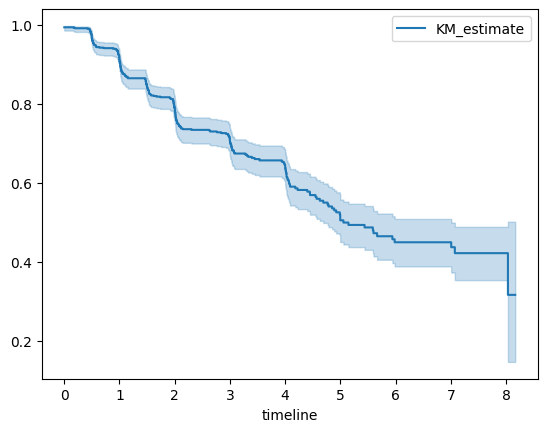

In [ ]:
from lifelines import KaplanMeierFitter

# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Fit the model using the durations and event_observed columns from your dataset
kmf.fit(durations=df['Years.bl'], event_observed=df['PROGRESSION'])

# Plot the survival curve
kmf.plot()


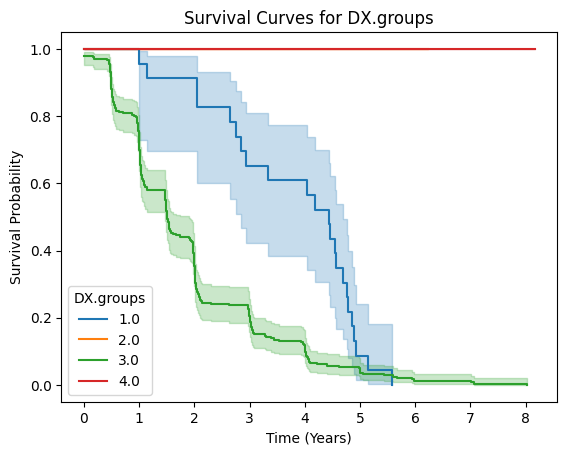

In [ ]:
# Create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Group the data by 'DX.groups'
grouped_data = df.groupby('DX.groups')

# Iterate over each group and fit Kaplan-Meier model and plot the survival curve
for name, group in grouped_data:
    kmf.fit(group['Years.bl'], event_observed=group['PROGRESSION'], label=name)
    kmf.plot()

# Add labels and legend
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.title('Survival Curves for DX.groups')
plt.legend(title='DX.groups')
plt.show()


In [ ]:
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

group_1 = df[df['DX.groups'] == 1]['Years.bl']
group_2 = df[df['DX.groups'] == 3]['Years.bl']




In [ ]:
event_observed_1 = df[df['DX.groups'] == 1]['PROGRESSION']
event_observed_2 = df[df['DX.groups'] == 3]['PROGRESSION']

In [ ]:
results = logrank_test(group_1, group_2, event_observed_1, event_observed_2)
print("Logrank test p-value:", results.p_value)

Logrank test p-value: 7.632171096005644e-05


In [ ]:
# There is strong evidence (p<0.05) to suggest that the survival experiences of the two groups(LMCI & EMCI) are different.

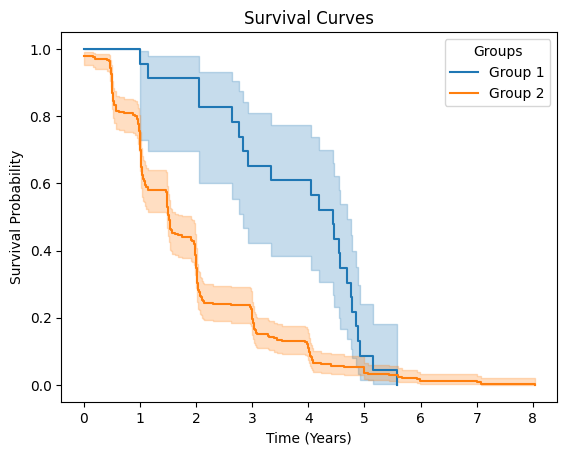

In [ ]:
kmf = KaplanMeierFitter()

kmf.fit(group_1, event_observed=event_observed_1, label='Group 1')
ax = kmf.plot()

kmf.fit(group_2, event_observed=event_observed_2, label='Group 2')
kmf.plot(ax=ax)

# Add labels and legend
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.title('Survival Curves')
plt.legend(title='Groups')
plt.show()

In [ ]:
# Assuming your DataFrame is named 'df'
print(df[['PROGRESSION', 'DX.groups', 'Years.bl']])


     PROGRESSION  DX.groups  Years.bl
0            0.0        4.0  3.028063
1            0.0        4.0  3.025325
2            1.0        3.0  0.479124
3            0.0        4.0  3.085558
4            0.0        4.0  0.977413
..           ...        ...       ...
832          1.0        1.0  4.183436
833          1.0        1.0  4.923648
834          1.0        3.0  0.169747
835          1.0        1.0  5.145106
836          1.0        1.0  4.768011

[837 rows x 3 columns]


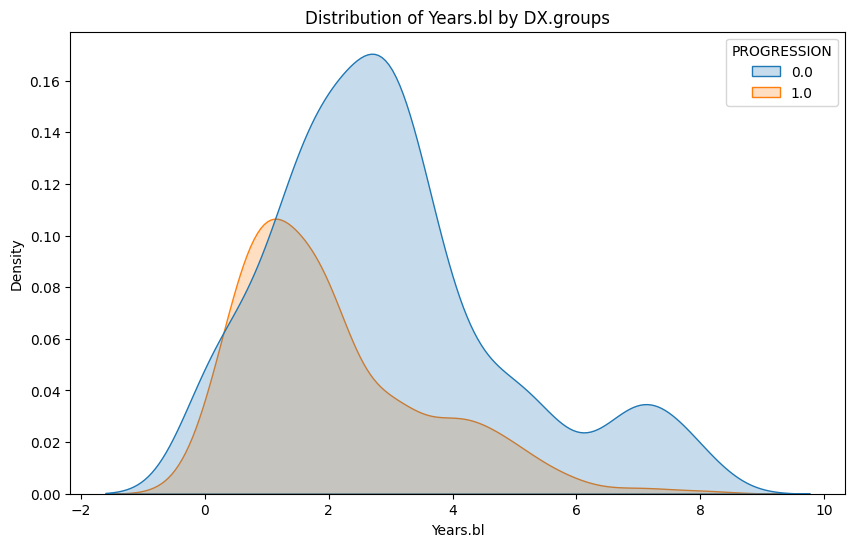

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the 'Years.bl' and 'DX.groups' columns
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Years.bl', hue='PROGRESSION', fill=True, palette='tab10')
plt.title('Distribution of Years.bl by DX.groups')
plt.xlabel('Years.bl')
plt.ylabel('Density')
plt.show()


Splitting the dataset into Df1 & Df2, Df1 contains all the patients who were eMCI at baseline, and Df2 contains all the patients who were lMCI at baseline.

In [ ]:
# Create df1 for rows with 'DX.groups' values 1 or 2
Df1 = df[df['DX.groups'].isin([1, 2])]

# Create df2 for rows with 'DX.groups' values 3 or 4
Df2 = df[df['DX.groups'].isin([3, 4])]

# Display the resulting dataframes
print("Df1:")
print(Df1)

print("\nDf2:")
print(Df2)

Df1:
     Years.bl  DX.groups  PROGRESSION       AGE  PTEDUCAT       FDG     CDRSB  \
387  3.509925        2.0          0.0 -1.091481  0.047608 -0.255897  1.072410   
388  3.025325        2.0          0.0 -1.249018  0.746697  0.341429  0.511405   
389  3.534565        2.0          0.0  1.350341  1.445786  0.537549  1.072410   
390  3.520876        2.0          0.0 -0.421949 -0.651481  1.610141 -0.049599   
391  2.472279        2.0          0.0  1.232188 -0.651481  0.533487 -0.610603   
..        ...        ...          ...       ...       ...       ...       ...   
831  4.568891        1.0          1.0  0.444504  0.047608  0.062315  2.194418   
832  4.183436        1.0          1.0 -0.343181  0.746697 -1.180955 -0.049599   
833  4.923648        1.0          1.0  0.930242 -0.651481 -0.720712  0.511405   
835  5.145106        1.0          1.0  0.864602  0.397153 -0.622452  0.511405   
836  4.768011        1.0          1.0  1.442237  0.746697 -0.179363  0.511405   

       ADAS11    ADAS1

In [ ]:
progression_counts = Df1['PROGRESSION'].value_counts()

# Display the counts
print(progression_counts)

PROGRESSION
0.0    268
1.0     23
Name: count, dtype: int64


In [ ]:
Df1.shape

(291, 26)

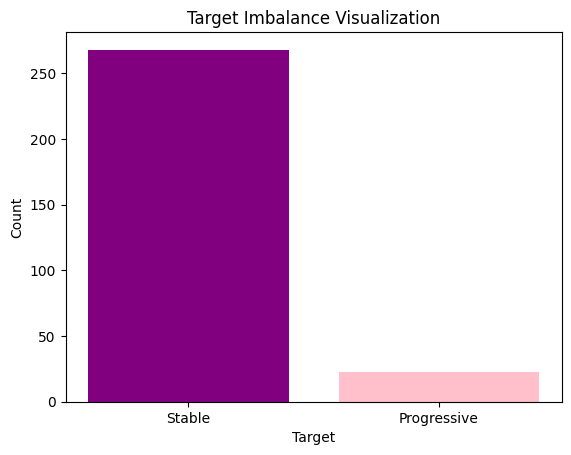

In [ ]:
# Count the occurrences of each class
class_counts = Df1['PROGRESSION'].value_counts()

# Create a bar plot
plt.bar(class_counts.index, class_counts.values, color=['purple', 'pink'])
plt.xticks(class_counts.index, ['Stable', 'Progressive'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Imbalance Visualization')
plt.show()


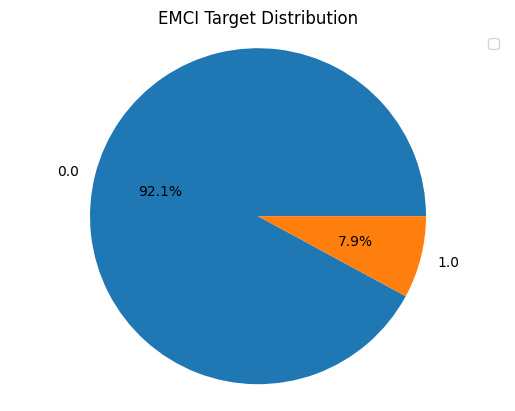

In [ ]:
# Count the occurrences of each class
class_counts = Df1['PROGRESSION'].value_counts()

# Create a pie chart
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('EMCI Target Distribution')
plt.legend('Stable =0', 'Progressive=1')
plt.show()


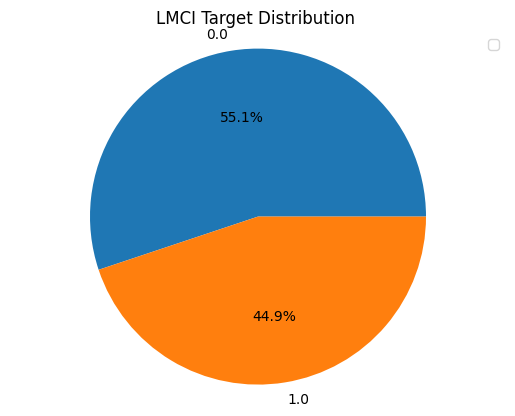

In [ ]:
# Count the occurrences of each class
class_counts = Df2['PROGRESSION'].value_counts()

# Create a pie chart
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('LMCI Target Distribution ')
plt.legend('Stable =0', 'Progressive=1')
plt.show()

Upsampling the minority class in EMCI dataset to handle class imbalance


In [ ]:
from sklearn.utils import resample

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = Df1[Df1['PROGRESSION'] == 0]
minority_class = Df1[Df1['PROGRESSION'] == 1]

# Upsample minority class with replacement
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([majority_class, minority_upsampled])
Df1 = df_upsampled.copy()

In [ ]:
progression_counts = Df1['PROGRESSION'].value_counts()

# Display the counts
print(progression_counts)

PROGRESSION
0.0    268
1.0    268
Name: count, dtype: int64


In [ ]:
progression_counts = Df2['PROGRESSION'].value_counts()

# Display the counts
print(progression_counts)

PROGRESSION
0.0    301
1.0    245
Name: count, dtype: int64


In [ ]:
Df2.head()

Years.bl  DX.groups  PROGRESSION       AGE  PTEDUCAT       FDG     CDRSB  \
0  3.028063        4.0          0.0 -0.737023 -2.049659 -0.515302 -0.610603   
1  3.025325        4.0          0.0  0.956499 -1.001025 -0.716827 -1.171608   
2  0.479124        3.0          1.0  0.903986  1.096242  0.242391 -0.610603   
3  3.085558        4.0          0.0  1.337213  1.445786 -1.031137  0.511405   
4  0.977413        4.0          0.0  0.483888 -1.350570 -0.907243 -0.610603   

     ADAS11    ADAS13      MMSE  RAVLT.immediate  RAVLT.learning  \
0  0.864120  0.672933 -0.302021         0.302551        1.166802   
1  1.820672  1.318501 -1.408329        -0.365278       -1.178976   
2 -0.090228  0.772595  0.804287         0.207147        0.775839   
3  1.600268  1.318501  0.804287        -1.223916       -0.006087   
4  0.202909 -0.070808 -1.408329        -0.651491       -0.788013   

   RAVLT.forgetting  RAVLT.perc.forgetting       FAQ     ABETA       TAU  \
0         -0.262172              -0.779658 -0.790042  1.235467 -1.001457   
1          0.147778               0.671814 -0.790042 -0.161441  0.006924   
2          2.197528               0.905922  0.649552 -0.594512  0.839915   
3          0.557728               1.186852  0.649552 -0.636897  0.319641   
4         -1.492021              -1.388340 -0.550110 -0.182147 -1.000725   

       PTAU  PTGENDER_Female  PTGENDER_Male  Ventricles  Hippocampus  \
0 -0.976455        -0.825059       0.825059    0.023582     0.004090   
1  0.071957         1.212034      -1.212034    0.026804     0.003599   
2  0.744532         1.212034      -1.212034    0.024153     0.004004   
3  0.440072        -0.825059       0.825059    0.035017     0.003514   
4 -0.965982        -0.825059       0.825059    0.019144     0.005291   

   WholeBrain  Entorhinal  Fusiform   MidTemp  
0    0.687715    0.002372  0.011335  0.011679  
1    0.624235    0.001532  0.012090  0.011981  
2    0.663323    0.001972  0.011096  0.013108  
3    0.613175    0.001750  0.010333  0.012770  
4    0.634471    0.002843  0.009460  0.013091

In [ ]:
# Code to drop the 'ICV' column from the dataset df
Df1 = Df1.drop('DX.groups', axis=1)

In [ ]:
Df1.shape

(536, 25)

In [ ]:
# Code to drop the 'ICV' column from the dataset df
Df2 = Df2.drop('DX.groups', axis=1)

In [ ]:
# Code to print the names of all columns in a DataFrame df
column_names = Df2.columns.tolist()
print(column_names)

['Years.bl', 'PROGRESSION', 'AGE', 'PTEDUCAT', 'FDG', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT.immediate', 'RAVLT.learning', 'RAVLT.forgetting', 'RAVLT.perc.forgetting', 'FAQ', 'ABETA', 'TAU', 'PTAU', 'PTGENDER_Female', 'PTGENDER_Male', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp']


Correlation Analysis


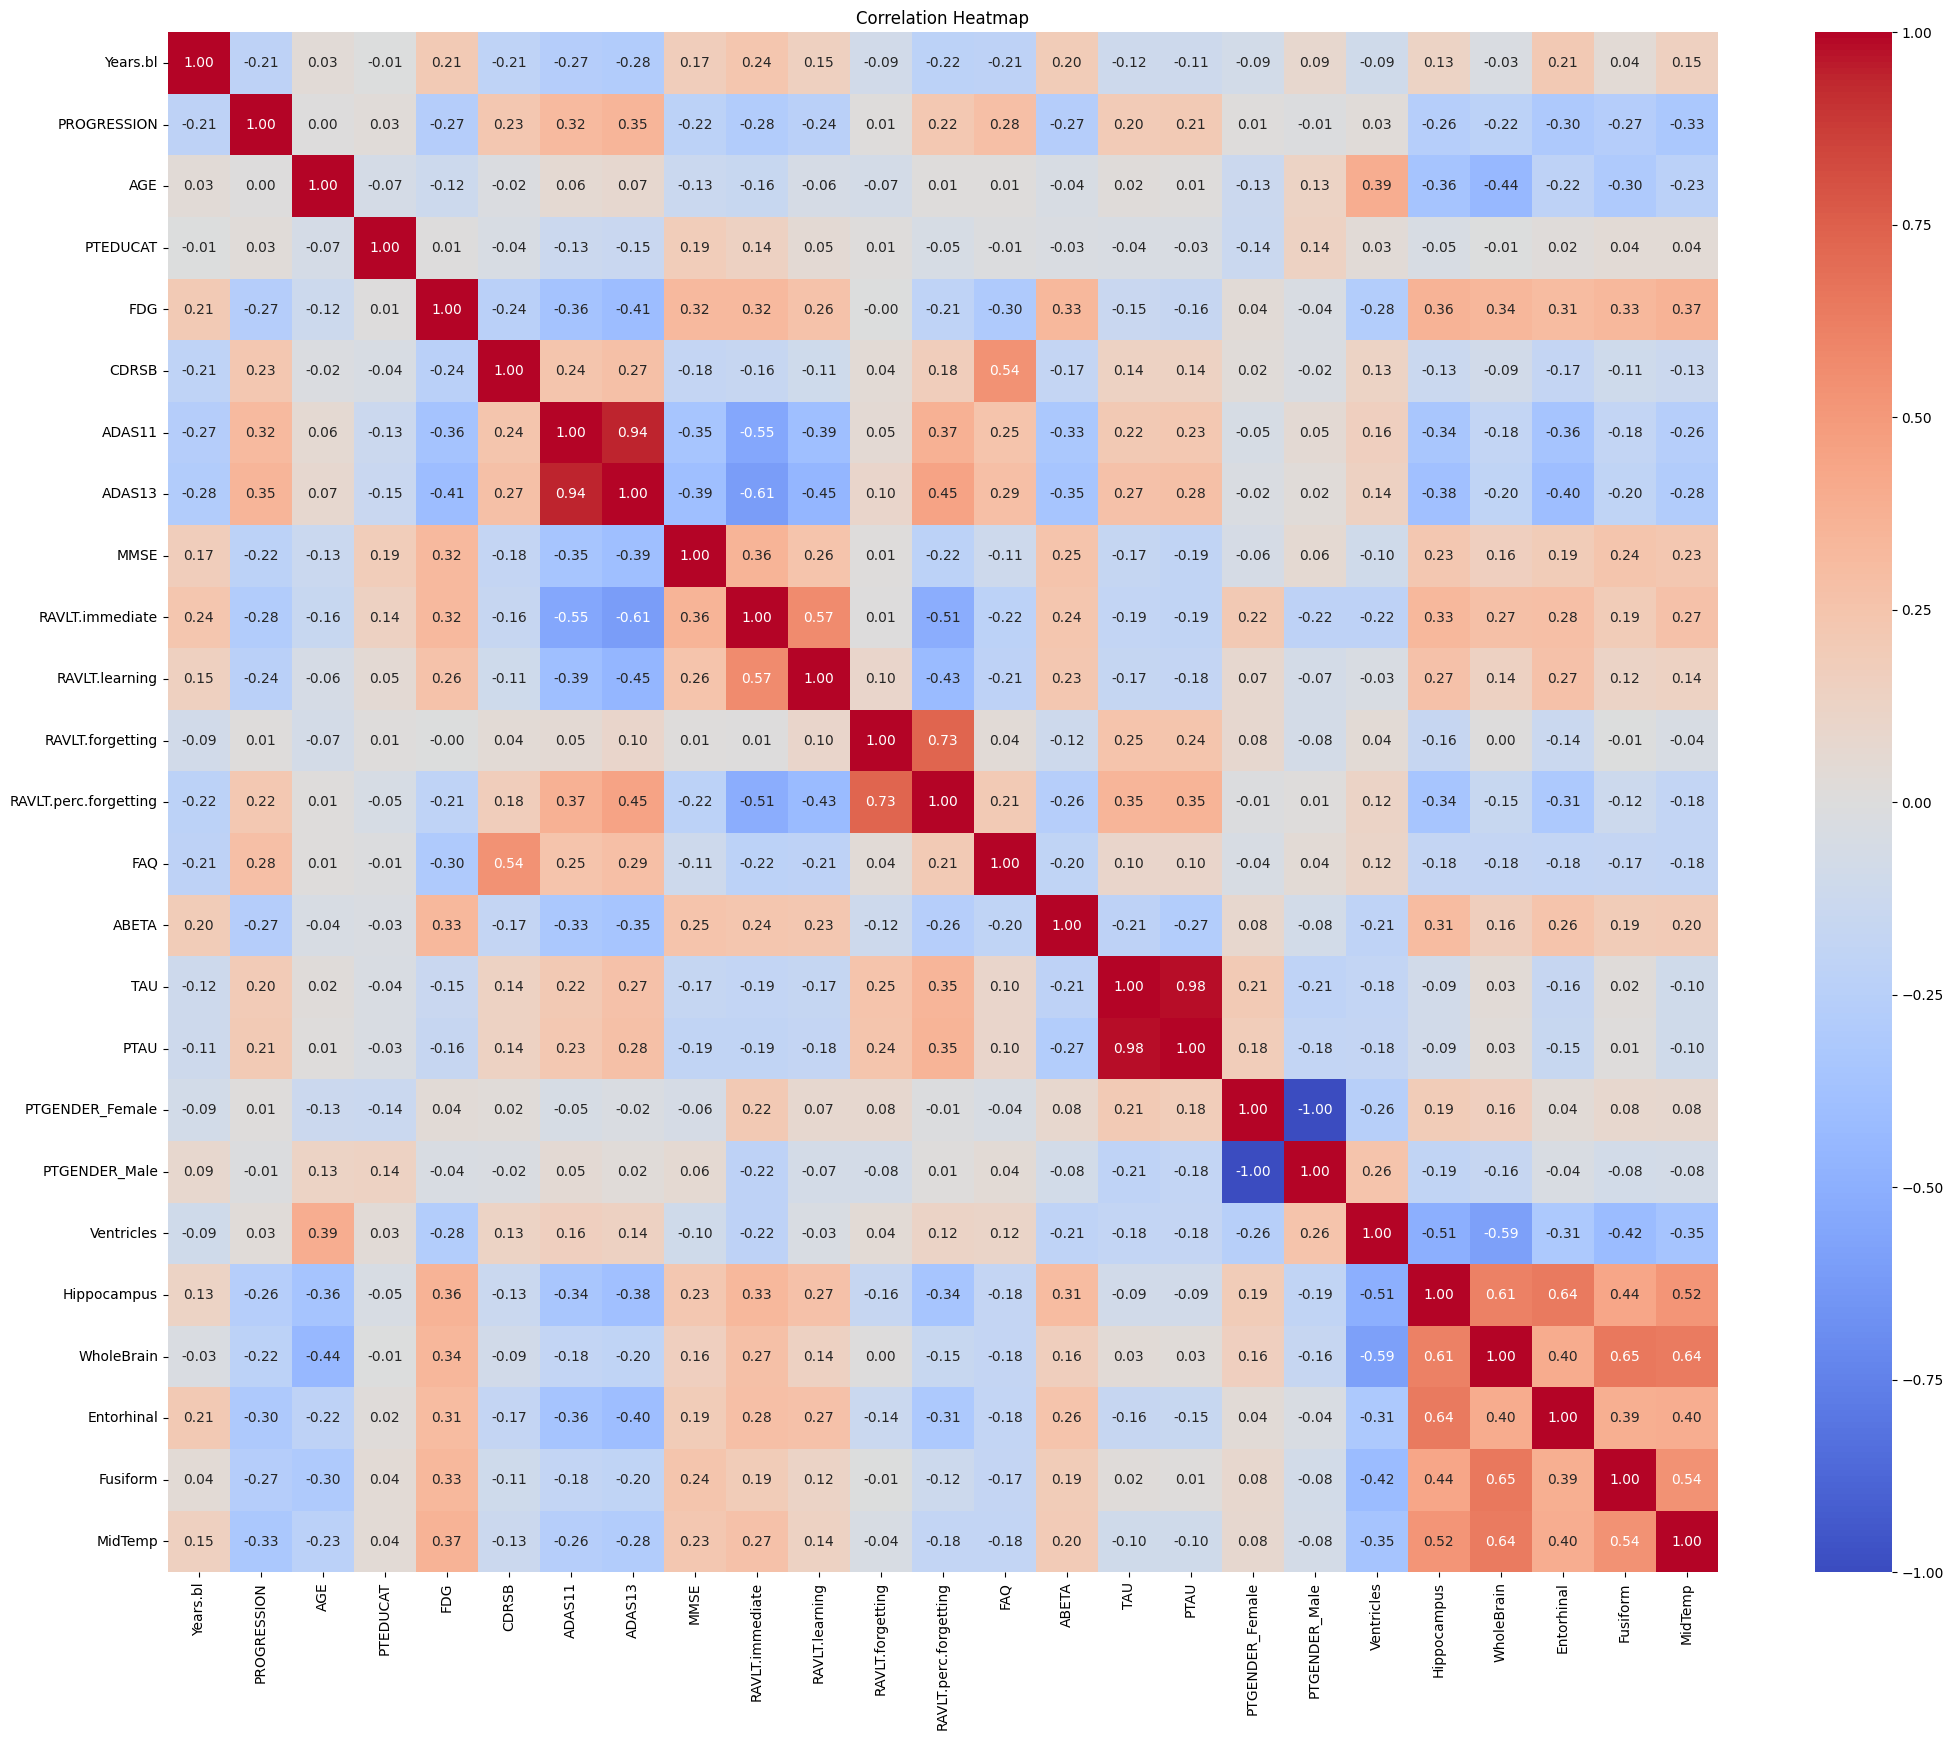

In [ ]:
# Calculate correlation matrix
corr_matrix = Df2.corr()

# Plot heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

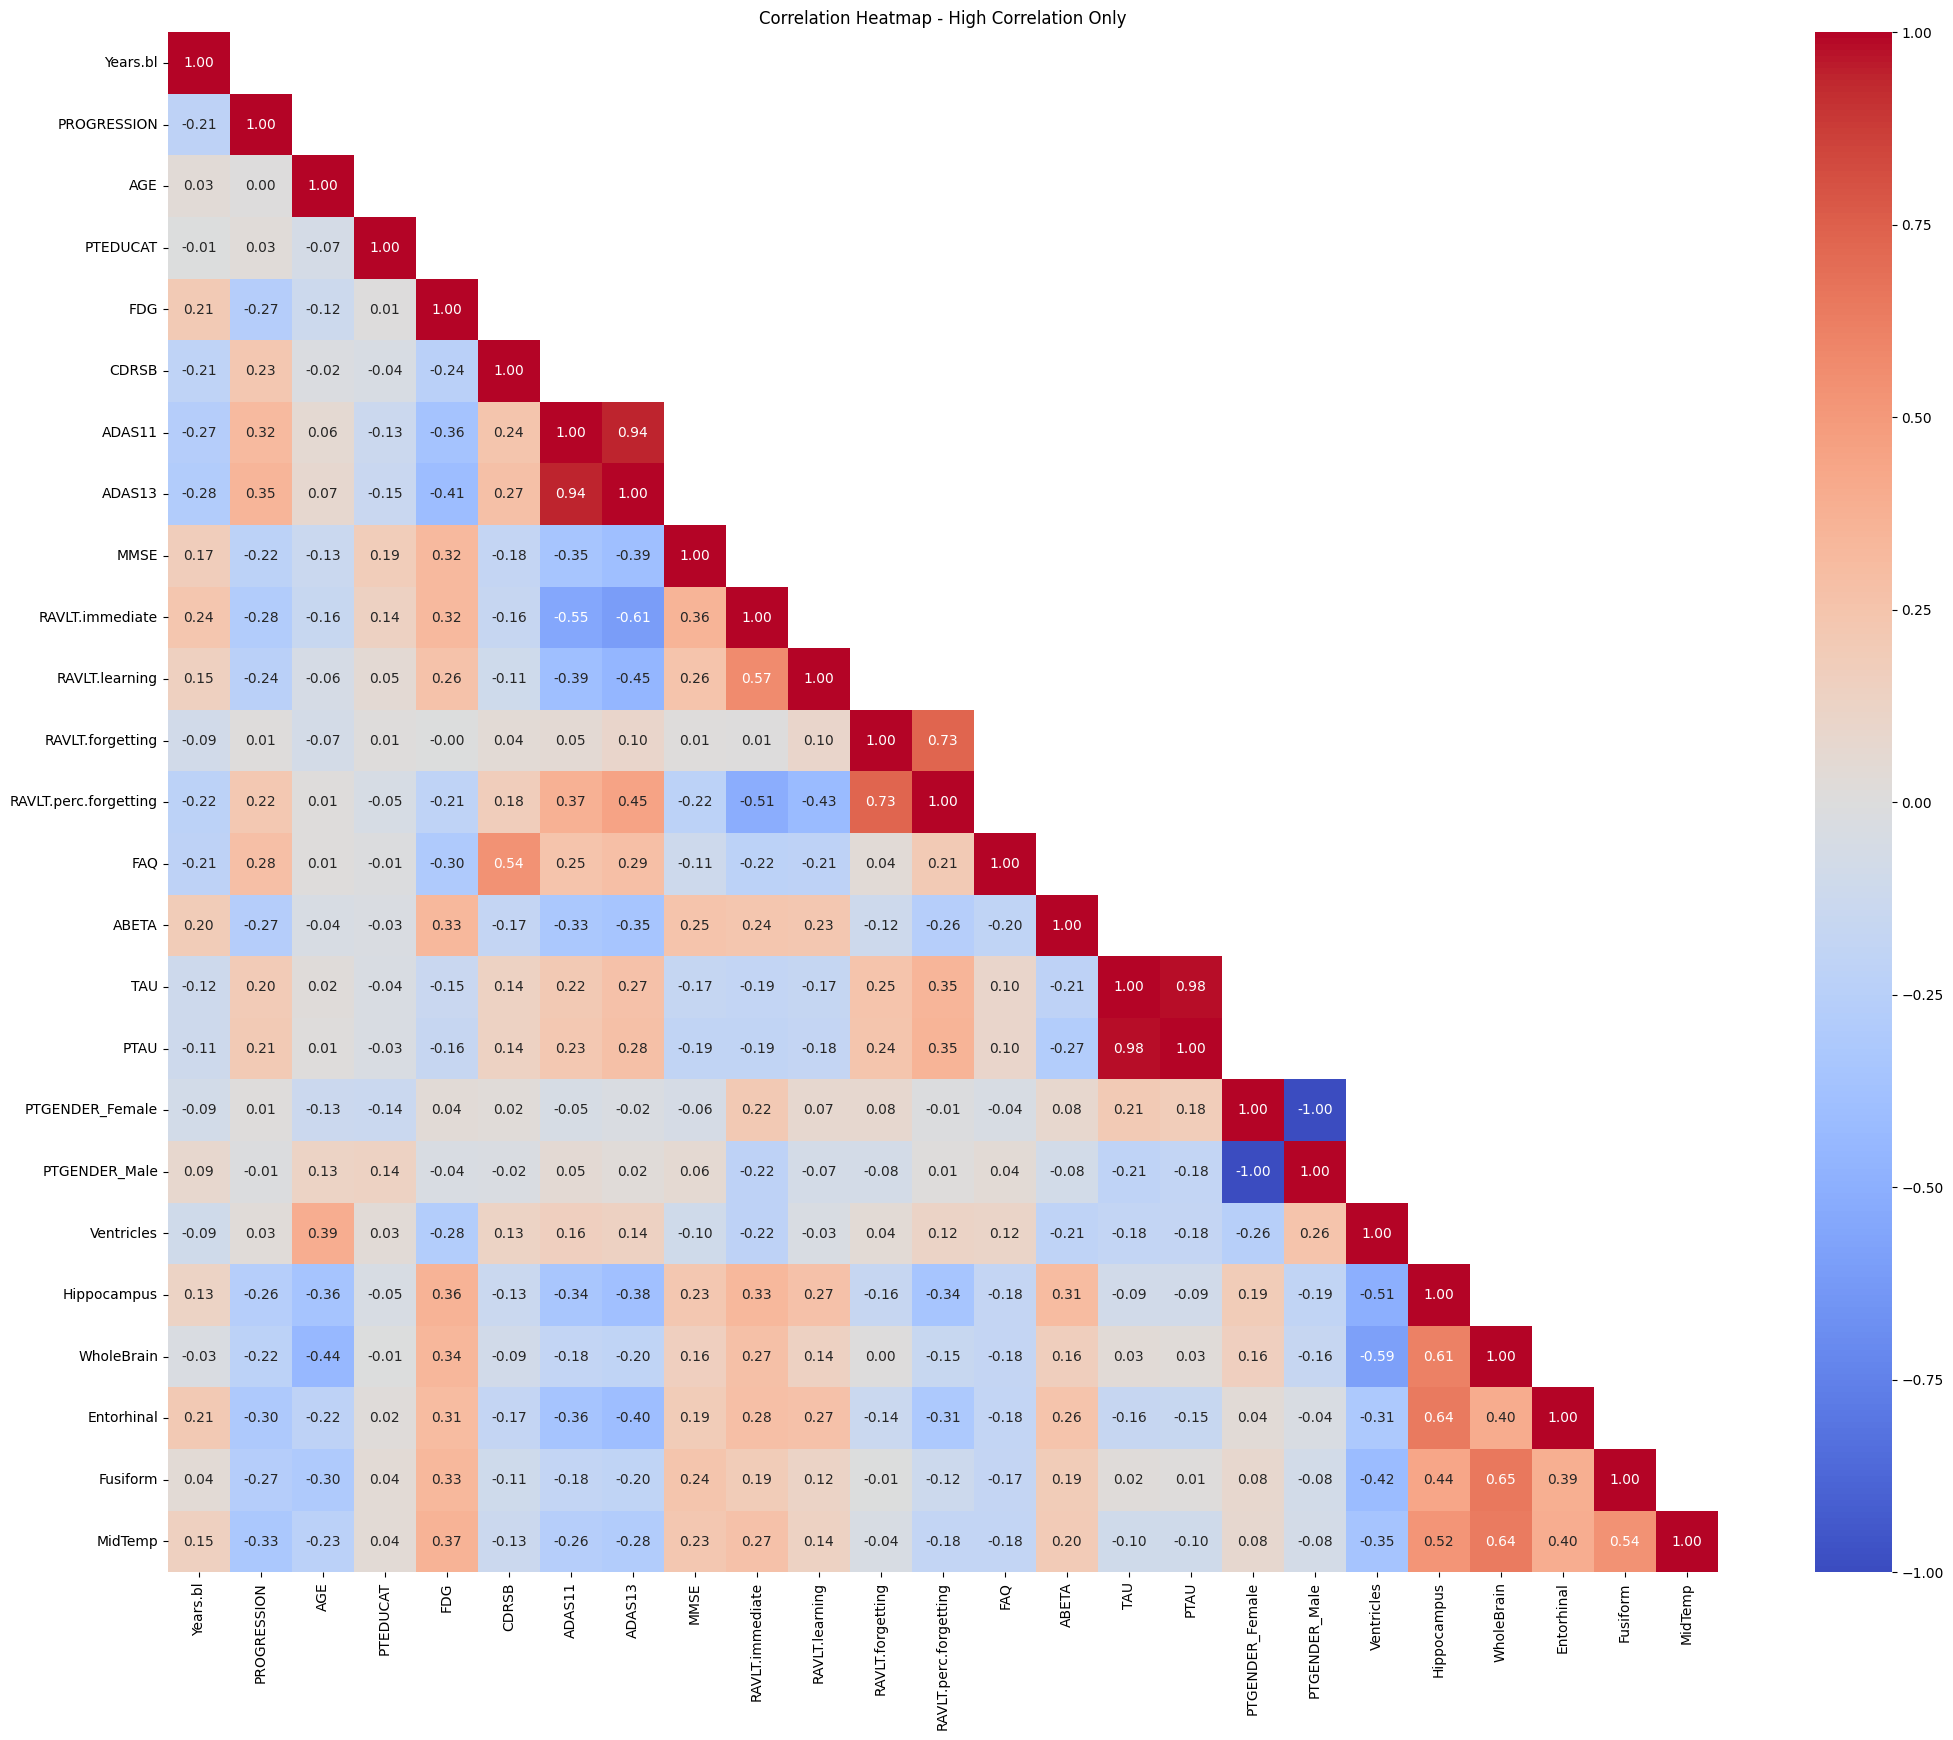

In [ ]:
import numpy as np

# Set threshold values for positive and negative correlation
pos_thresh = 0.7
neg_thresh = -0.7

# Filter correlation matrix based on threshold values
corr_matrix_filtered = corr_matrix.where(np.triu(np.abs(corr_matrix) > pos_thresh) | np.tril(np.abs(corr_matrix) > neg_thresh))

# Plot heatmap for filtered correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Heatmap - High Correlation Only')
plt.show()


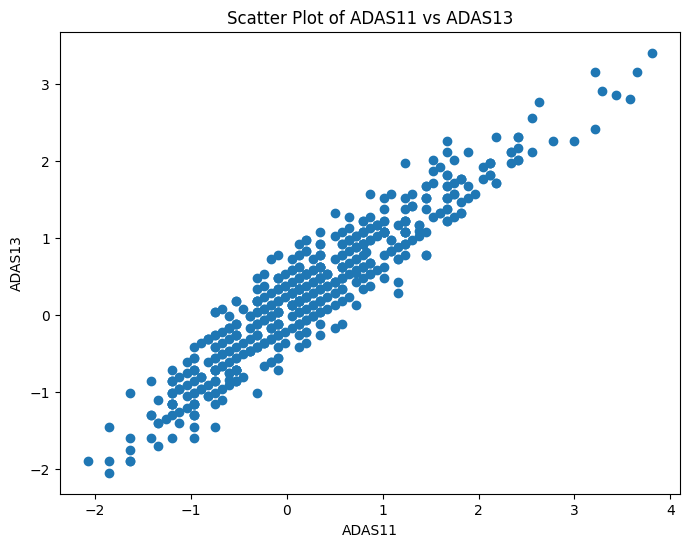

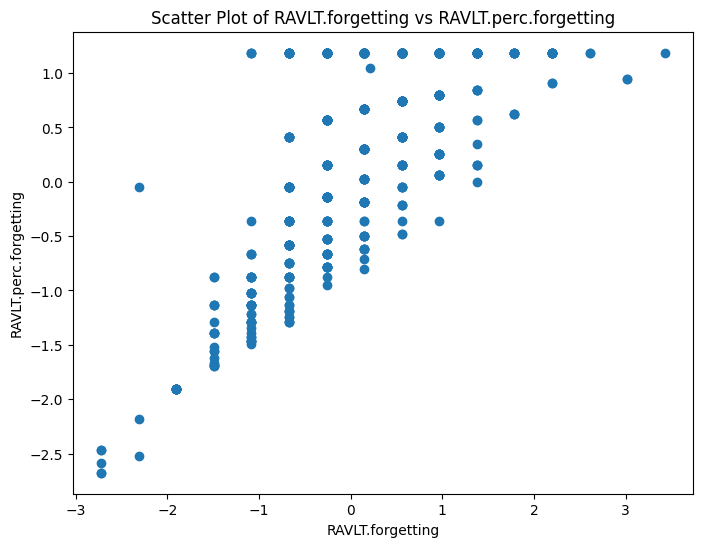

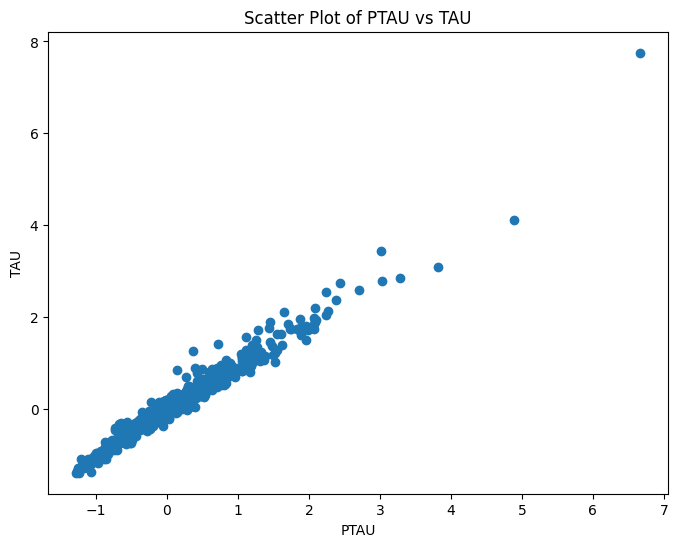

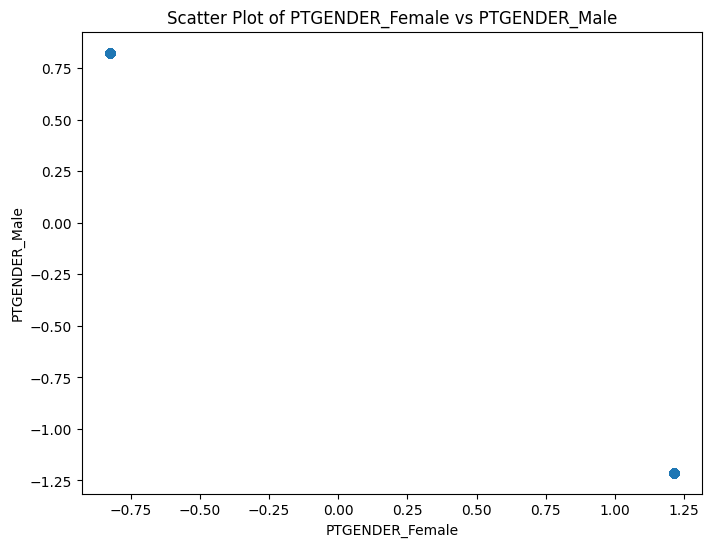

In [ ]:
# Scatter plot for ADAS11 and ADAS13
plt.figure(figsize=(8, 6))
plt.scatter(Df2['ADAS11'], Df2['ADAS13'])
plt.xlabel('ADAS11')
plt.ylabel('ADAS13')
plt.title('Scatter Plot of ADAS11 vs ADAS13')
plt.show()

# Scatter plot for RAVLT.forgetting and RAVLT.perc.forgetting
plt.figure(figsize=(8, 6))
plt.scatter(Df2['RAVLT.forgetting'], Df2['RAVLT.perc.forgetting'])
plt.xlabel('RAVLT.forgetting')
plt.ylabel('RAVLT.perc.forgetting')
plt.title('Scatter Plot of RAVLT.forgetting vs RAVLT.perc.forgetting')
plt.show()

# Scatter plot for PTAU and TAU
plt.figure(figsize=(8, 6))
plt.scatter(Df2['PTAU'], Df2['TAU'])
plt.xlabel('PTAU')
plt.ylabel('TAU')
plt.title('Scatter Plot of PTAU vs TAU')
plt.show()

# Scatter plot for PTGENDER_Female and PTGENDER_Male
plt.figure(figsize=(8, 6))
plt.scatter(Df1['PTGENDER_Female'], Df1['PTGENDER_Male'])
plt.xlabel('PTGENDER_Female')
plt.ylabel('PTGENDER_Male')
plt.title('Scatter Plot of PTGENDER_Female vs PTGENDER_Male')
plt.show()

In [ ]:
# Df1 = Df1.drop(['ADAS11', 'RAVLT.perc.forgetting', 'TAU'], axis=1)
# Dropping features after correlation analysis

In [ ]:
column_names = Df1.columns.tolist()
print(column_names)

['Years.bl', 'PROGRESSION', 'AGE', 'PTEDUCAT', 'FDG', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT.immediate', 'RAVLT.learning', 'RAVLT.forgetting', 'RAVLT.perc.forgetting', 'FAQ', 'ABETA', 'TAU', 'PTAU', 'PTGENDER_Female', 'PTGENDER_Male', 'Ventricles', 'Hippocampus', 'WholeBrain', 'Entorhinal', 'Fusiform', 'MidTemp']


In [ ]:
Df1.shape

(536, 25)

Train-Test Split

In [ ]:
# Selecting X features excluding 'PROGRESSION' and 'Time'
x = Df1.drop(['PROGRESSION', 'Years.bl'], axis=1)

# Selecting Y features 'PROGRESSION' and 'Time'
y = Df1[['PROGRESSION', 'Years.bl']]

In [ ]:
from sklearn.model_selection import train_test_split, KFold
# Convert X to array-like format
X = x.values

# Convert Y to structured array format
Y = np.array([(event, time) for event, time in zip(y['PROGRESSION'].astype(bool), y['Years.bl'])],
                        dtype=[('PROGRESSION', bool), ('Years.bl', float)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, stratify=y["PROGRESSION"], random_state=0
)

In [ ]:
# Verify the shapes of X and y
print("Shape of X (array-like):", X_train.shape)
print("Shape of Y (structured array):", y_train.shape)

Shape of X (array-like): (375, 23)
Shape of Y (structured array): (375,)


In [ ]:
# Verify the shapes of X and y
print("Shape of X (array-like):", X_test.shape)
print("Shape of Y (structured array):", y_test.shape)

Shape of X (array-like): (161, 23)
Shape of Y (structured array): (161,)


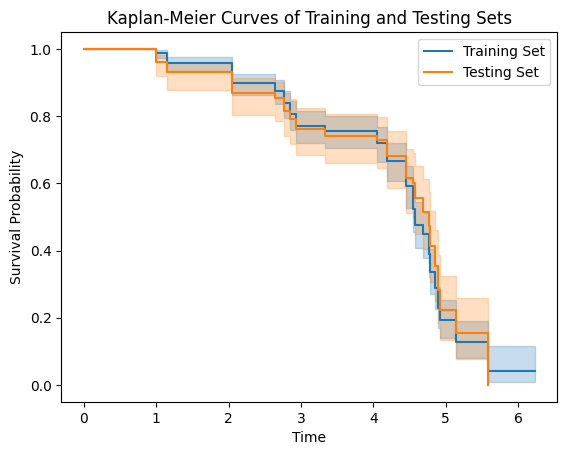

In [ ]:
from lifelines import KaplanMeierFitter

kmf_train = KaplanMeierFitter()
kmf_train.fit(y_train['Years.bl'], event_observed=y_train['PROGRESSION'], label='Training Set')
kmf_train.plot(ci_show=True)

kmf_test = KaplanMeierFitter()
kmf_test.fit(y_test['Years.bl'], event_observed=y_test['PROGRESSION'], label='Testing Set')
kmf_test.plot(ci_show=True)

plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Curves of Training and Testing Sets')
plt.legend()
plt.grid(False)
plt.savefig('1.jpg',dpi=500)
plt.show()

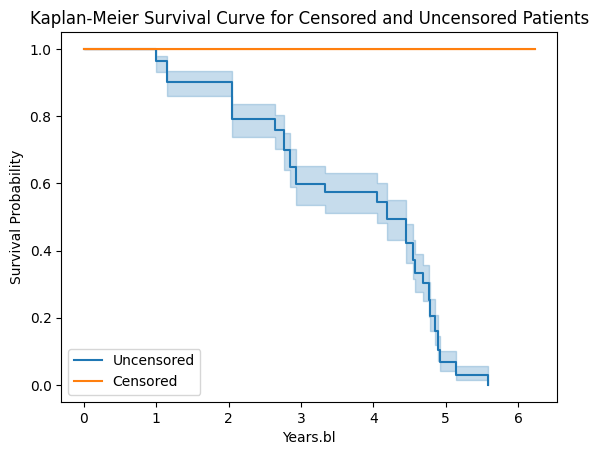

In [ ]:
kmf = KaplanMeierFitter()

# Splitting data based on 'PROGRESSION' column
uncensored = Df1[Df1['PROGRESSION'] == 1]
censored = Df1[Df1['PROGRESSION'] == 0]

# Fit Kaplan-Meier estimator for uncensored patients
kmf.fit(uncensored['Years.bl'], event_observed=uncensored['PROGRESSION'], label='Uncensored')
kmf.plot_survival_function()

# Fit Kaplan-Meier estimator for censored patients
kmf.fit(censored['Years.bl'], event_observed=censored['PROGRESSION'], label='Censored')
kmf.plot_survival_function()

# Display the plot
plt.title('Kaplan-Meier Survival Curve for Censored and Uncensored Patients')
plt.xlabel('Years.bl')
plt.ylabel('Survival Probability')
plt.show()

Numerical Variable Distributions:



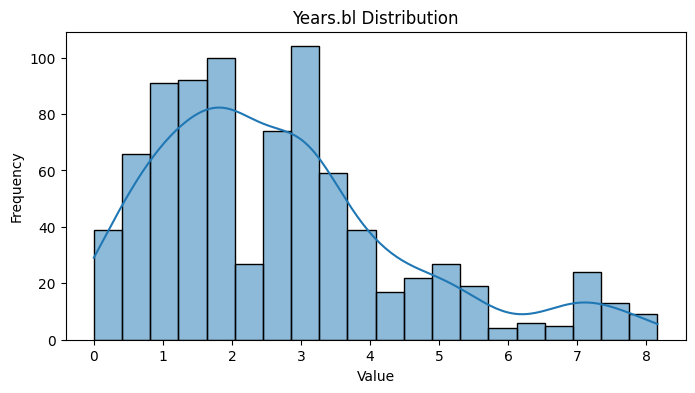

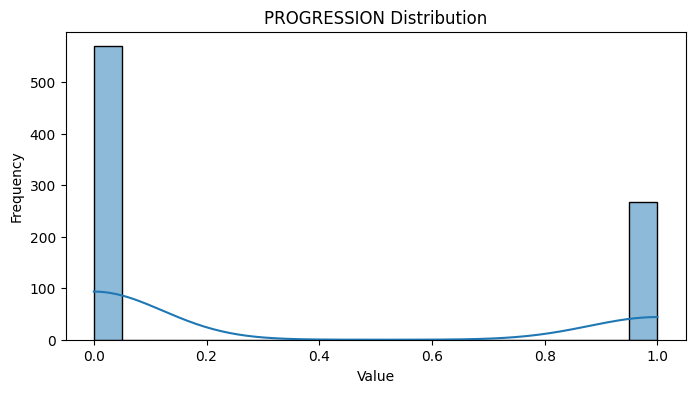

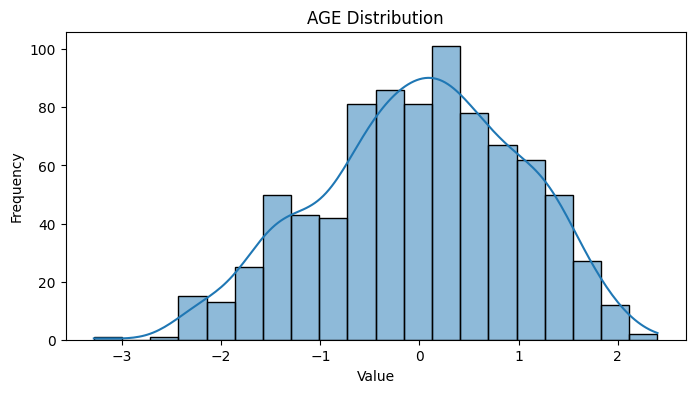

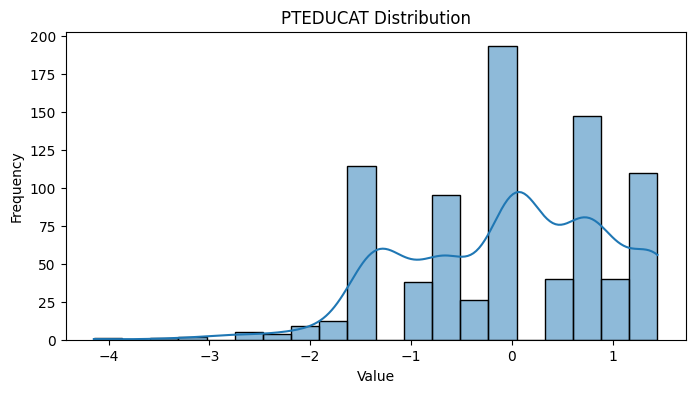

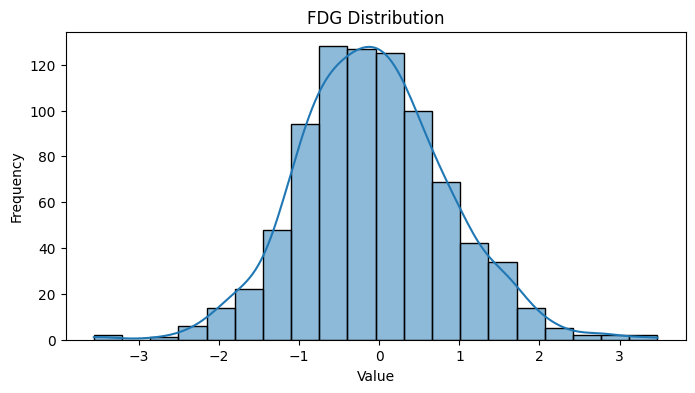

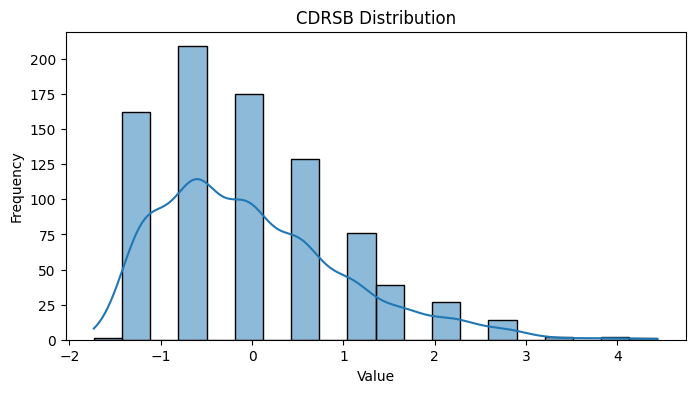

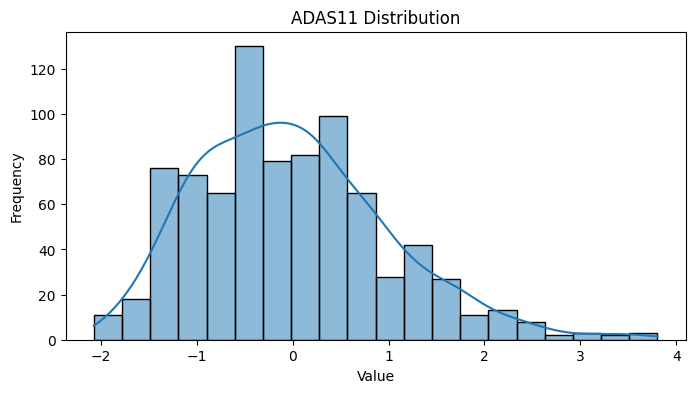

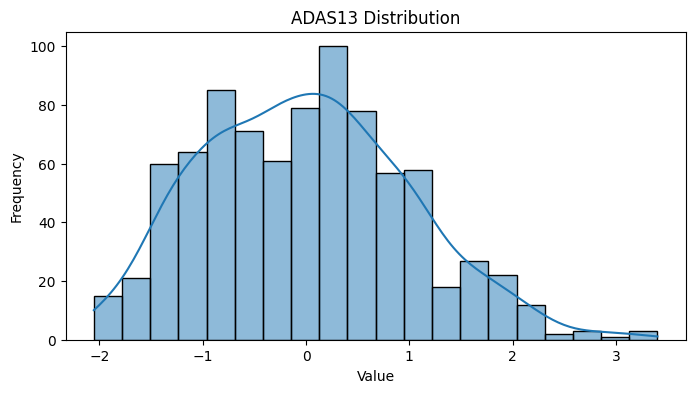

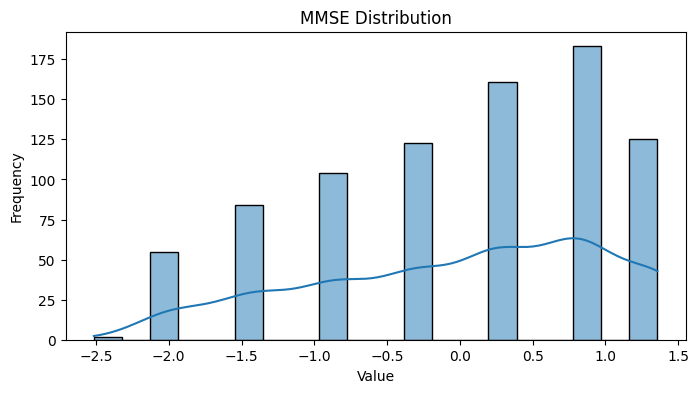

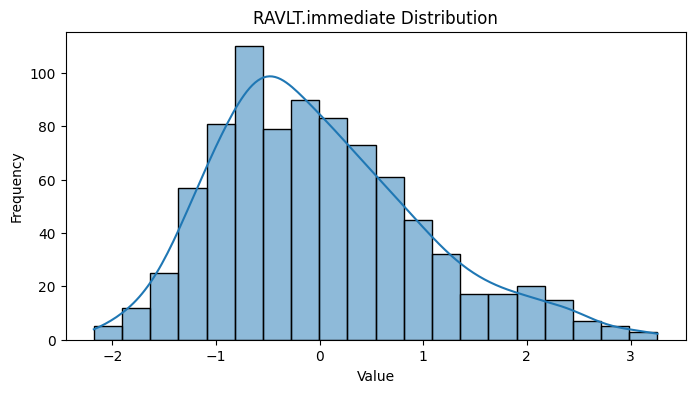

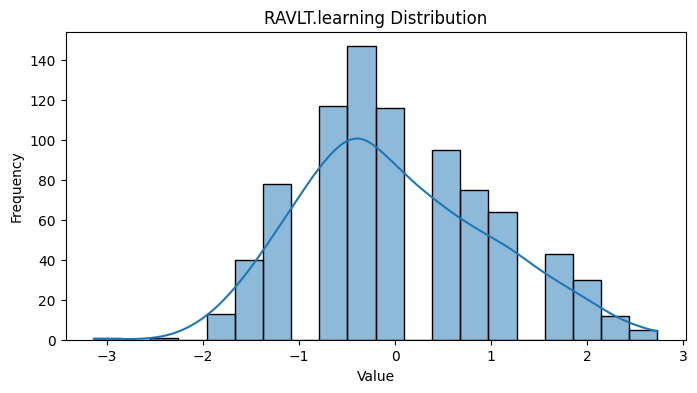

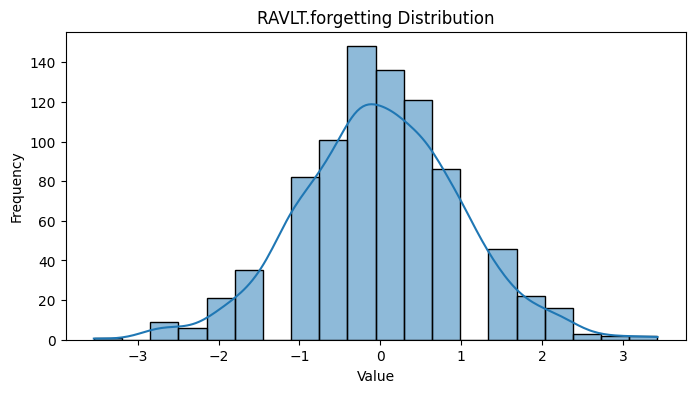

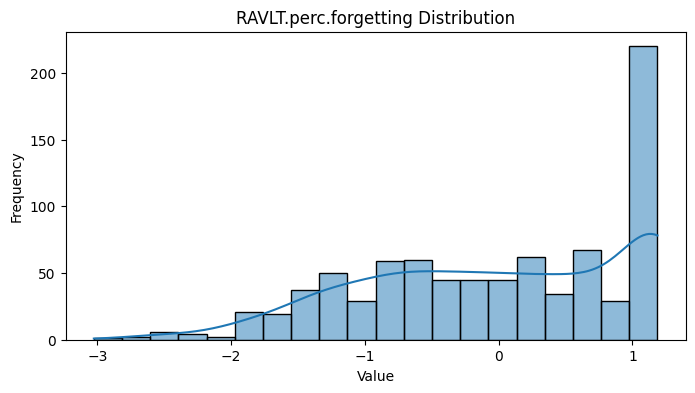

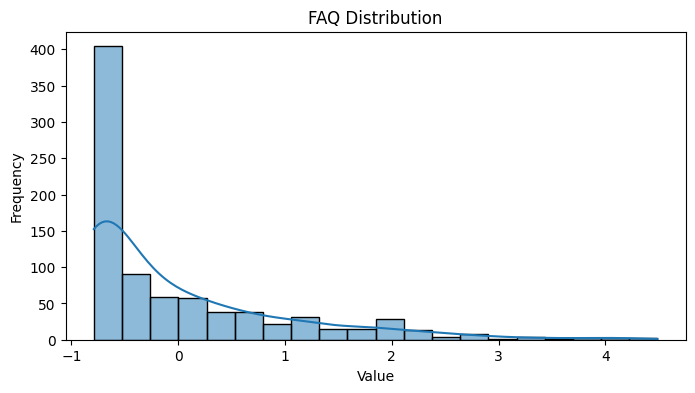

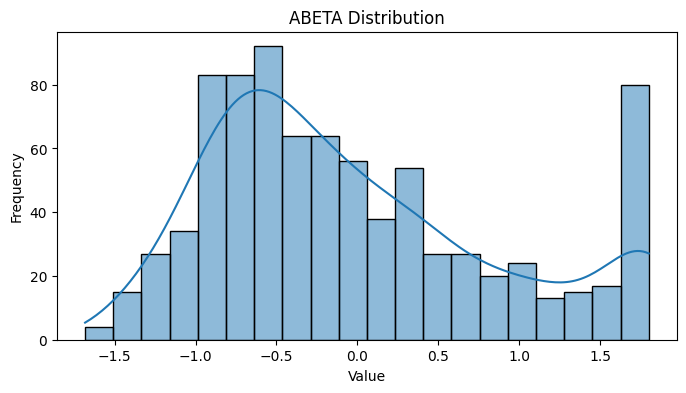

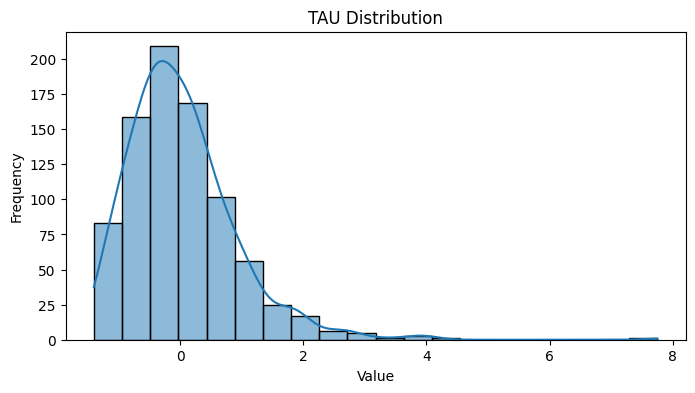

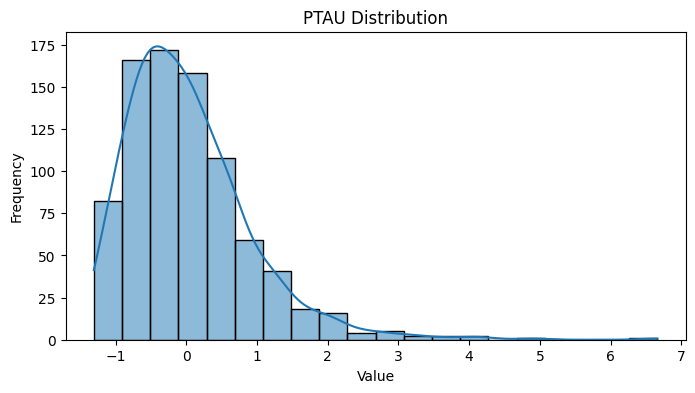

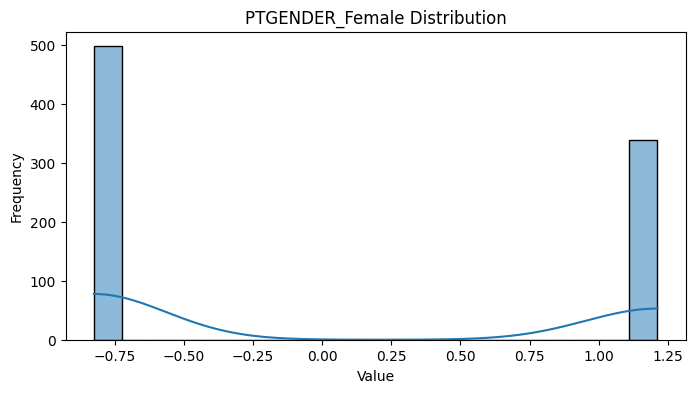

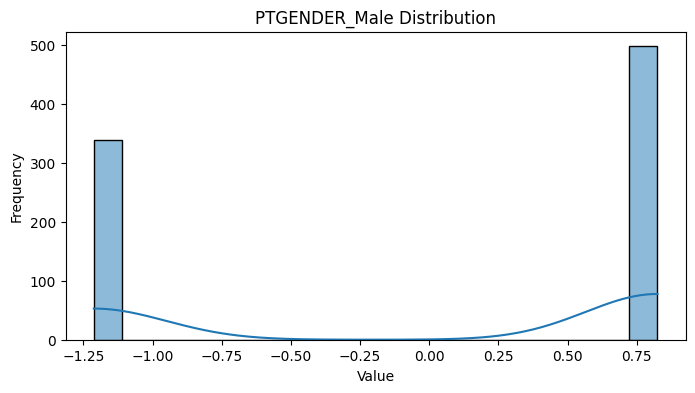

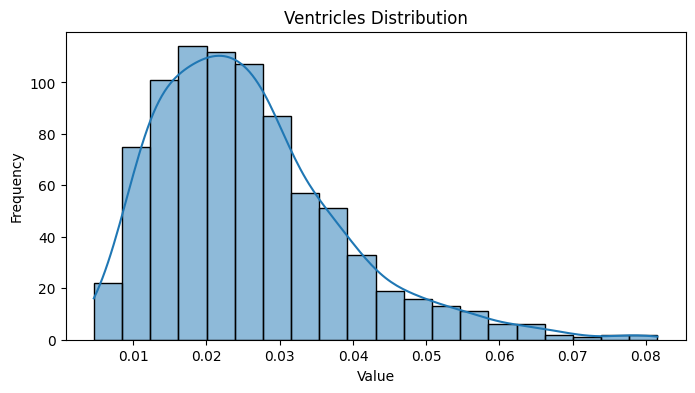

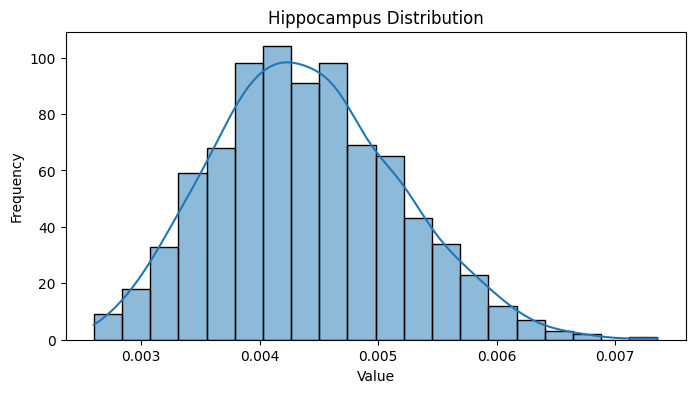

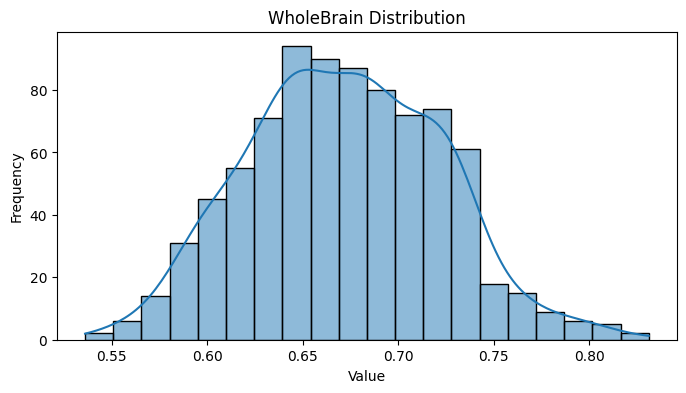

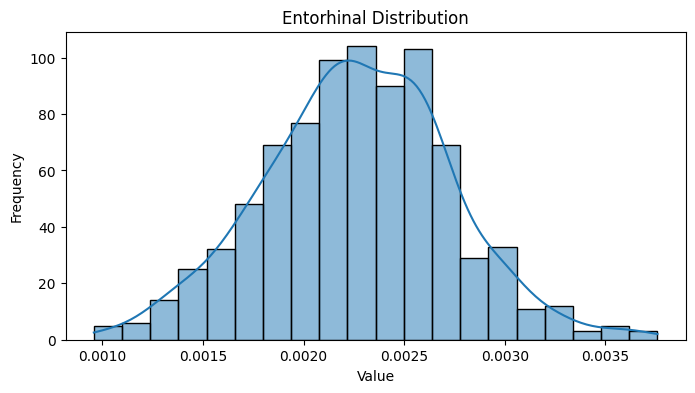

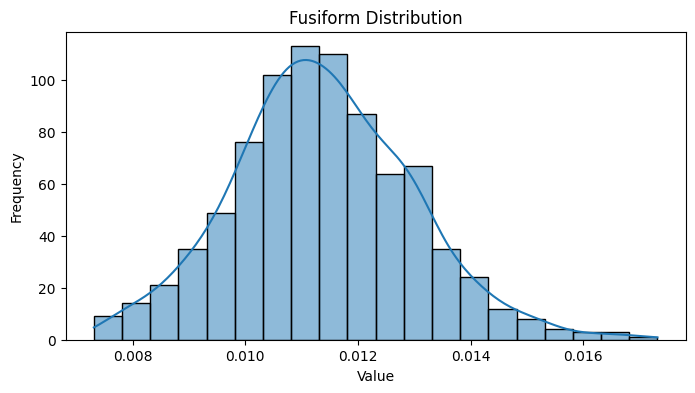

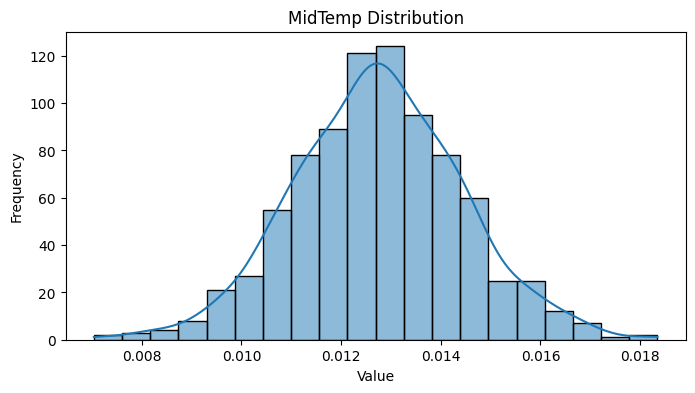

Categorical Variable Distributions:



In [ ]:
# Identify numerical and categorical columns for df
numerical_cols = Df1.select_dtypes(include=['number']).columns.tolist()
categorical_cols = Df1.select_dtypes(include=['object', 'category']).columns.tolist()

def plot_numerical_distribution(Df1, numerical_columns):
    print('Numerical Variable Distributions:\n')
    for col in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(Df1[col], kde=True, bins=20)
        plt.title(f'{col} Distribution')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

def plot_categorical_distribution(Df1, categorical_columns):
    print('Categorical Variable Distributions:\n')
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=Df1, x=col)
        plt.title(f'{col} Distribution')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Plotting numerical distributions for df1
plot_numerical_distribution(df, numerical_cols)

# Plotting categorical distributions for df1
plot_categorical_distribution(df, categorical_cols)

In [ ]:
lower, upper = np.percentile(Y["Years.bl"], [10, 90])
Df2_times = np.arange(lower, upper + 1)
# Print the lower and upper percentiles and the array of values
print("Lower Percentile:", lower)
print("Upper Percentile:", upper)
print("Df2_times Array:", Df2_times)

Lower Percentile: 1.9777549620000001
Upper Percentile: 4.923648186
Df2_times Array: [1.97775496 2.97775496 3.97775496 4.97775496]


Training & Testing the models:
1. RSF

In [ ]:
from sklearn.model_selection import GridSearchCV
from sksurv.ensemble import RandomSurvivalForest
from sklearn.model_selection import KFold

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Initialize the GridSearchCV with k-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(RandomSurvivalForest(random_state=42), param_grid, cv=cv)

# Fit the model using GridSearchCV
gs.fit(X_train, y_train)


In [ ]:
# Display the best hyperparameters
print("Best Hyperparameters:", gs.best_params_)

In [ ]:
from sksurv.metrics import concordance_index_censored


# Calculate Concordance Index on the training set
c_index_train = concordance_index_censored(y_train['PROGRESSION'].astype(bool), y_train['Years.bl'], gs.predict(X_train))
print("C index (Train):", c_index_train)

# Calculate Concordance Index on the test set
c_index_test = concordance_index_censored(y_test['PROGRESSION'].astype(bool), y_test['Years.bl'], gs.predict(X_test))
print("C index (Test):", c_index_test)

In [ ]:
# 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300

In [ ]:
# Predict the survival probability of the test set

test_survival_prob = rsf.predict_survival_function(X_test)

plt.figure(figsize=(10,6))
# Kaplan-Meier
for prob in test_survival_prob[:30]:
    plt.plot(prob.x,prob.y,lw=2)
plt.grid(False)
plt.xlabel('Years.bl')
plt.ylabel('Survival Probability')
plt.title('Random Survival Forest Survival Curves on Test Set')
plt.savefig('4.jpg',dpi=500)
plt.show()

In [ ]:
from sksurv.metrics import brier_score
from sklearn.metrics import brier_score_loss
from sksurv.metrics import integrated_brier_score

In [ ]:
survs = gs.predict_survival_function(X_test)
times = np.arange(0,5)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_train, y_test, preds, times)
print(score)

2. Coxnet

In [ ]:
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sksurv.metrics import concordance_index_censored
param_grid = {
    'l1_ratio': [0.1, 0.5, 0.9]
}
# Define the scoring metric for GridSearchCV
scorer = make_scorer(concordance_index_censored, greater_is_better=True)

# Initialize the CoxnetSurvivalAnalysis model
model = CoxnetSurvivalAnalysis()

# Initialize GridSearchCV with the model, parameter grid, and scoring metric
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5)

# Fit the model to the dataset
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)

In [ ]:
from sksurv.linear_model import CoxnetSurvivalAnalysis

estimator = CoxnetSurvivalAnalysis(l1_ratio=0.1, fit_baseline_model=True)
estimator.fit(X_train, y_train)


CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=0.1)

In [ ]:
# Calculate Concordance Index on the test set
c_index_test = concordance_index_censored(y_test['PROGRESSION'].astype(bool), y_test['Years.bl'], estimator.predict(X_test))
print("C index (Test):", c_index_test)

C index (Test): (0.8342114506498068, 4750, 944, 0, 0)


In [ ]:
survs = estimator.predict_survival_function(X_test)
times = np.arange(0,5)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_train, y_test, preds, times)
print(score)

In [ ]:
!pip install scipy
from scipy.stats import uniform

3. Extra Survival Trees

In [ ]:
from sksurv.ensemble import ExtraSurvivalTrees

In [ ]:
from sksurv.ensemble import ExtraSurvivalTrees
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ExtraSurvivalTrees
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'n_estimators': [50, 100, 150],
    'random_state': [42]
}

# Initialize the ExtraSurvivalTrees model
model = ExtraSurvivalTrees()

# Initialize GridSearchCV with the model, parameter grid, and scoring metric
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the model to the dataset
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)


In [ ]:
# Initialize the ExtraSurvivalTrees model

extrast = ExtraSurvivalTrees(n_estimators=100, max_depth= None, min_samples_split=5, min_samples_leaf=5, bootstrap=True, random_state=42)


# Fit the ExtraSurvivalTrees model to the training data
extrast.fit(X_train, y_train)

ExtraSurvivalTrees(min_samples_leaf=5, min_samples_split=5, random_state=42)

In [ ]:
from sksurv.metrics import concordance_index_censored

# Calculate Concordance Index on the test set
c_index_test = concordance_index_censored(y_test['PROGRESSION'].astype(bool), y_test['Years.bl'], extrast.predict(X_test))
print("C index (Test):", c_index_test)

C index (Test): (0.9332630839480155, 5314, 380, 0, 0)


In [ ]:
survs = extrast.predict_survival_function(X_test)
times = np.arange(0,5)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_train, y_test, preds, times)
print(score)

4. Gradient Boosting

In [ ]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

In [ ]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sklearn.model_selection import GridSearchCV



# Define the parameter grid for GradientBoostingSurvivalAnalysis
param_grid = {
    'n_estimators': [70, 100, 150],
    'max_depth': [5, 10, None],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 8],
    'random_state': [42]
}



# Initialize the GradientBoostingSurvivalAnalysis model
model = GradientBoostingSurvivalAnalysis(random_state=33, loss='coxph', learning_rate=0.05)

# Initialize GridSearchCV with the model, parameter grid, and scoring metric
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the model to the dataset
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)


In [ ]:
# Initialize the GradientBoostingSurvivalAnalysis model
GBS = GradientBoostingSurvivalAnalysis(loss='coxph', learning_rate=0.0001, max_depth= 5, min_samples_leaf=5, min_samples_split=5, n_estimators=100, random_state=42)

# Fit the GradientBoostingSurvivalAnalysis model to the training data
GBS.fit(X_train, y_train)


GradientBoostingSurvivalAnalysis(learning_rate=0.0001, max_depth=5,
                                 min_samples_leaf=5, min_samples_split=5,
                                 random_state=42)

In [ ]:
from sksurv.metrics import concordance_index_censored

# Calculate Concordance Index on the test set
c_index_test = concordance_index_censored(y_test['PROGRESSION'].astype(bool), y_test['Years.bl'], GBS.predict(X_test))
print("C index (Test):", c_index_test)

In [ ]:
survs = GBS.predict_survival_function(X_test)
times = np.arange(0,5)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_train, y_test, preds, times)
print(score)

In [ ]:
# Estimate the survival function for the first 10 samples.

surv_funcs = GBS.predict_survival_function(X.iloc[:10])

# Plot the estimated survival functions.

for fn in surv_funcs:
    plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

5. Survival Tree

In [ ]:
from sksurv.tree import SurvivalTree
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6, 10]
}
# Initialize the SurvivalTree model
survival_tree = SurvivalTree()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(survival_tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


In [ ]:
from sksurv.tree import SurvivalTree
sv = SurvivalTree(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [ ]:
sv.fit(X_train, y_train, sample_weight=None, check_input=True)

SurvivalTree(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [ ]:
from sksurv.metrics import concordance_index_censored

# Calculate Concordance Index on the test set
c_index_test = concordance_index_censored(y_test['PROGRESSION'].astype(bool), y_test['Years.bl'], sv.predict(X_test))
print("C index (Test):", c_index_test)

In [ ]:
survs = sv.predict_survival_function(X_test)
times = np.arange(0,5)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_train, y_test, preds, times)
print(score)

6. CoxPH

In [ ]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for alpha
param_grid = {'alpha': np.logspace(-4, -1, 4)}

# Create the CoxPHSurvivalAnalysis model with alpha regularization
CPH = CoxPHSurvivalAnalysis()

# Perform grid search CV to find the optimal alpha value
grid_search = GridSearchCV(CPH, param_grid, cv=5, scoring='neg_log_loss', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best alpha value found by grid search
print("Best alpha value:", grid_search.best_params_['alpha'])


In [ ]:
 # Fit the CoxPHSurvivalAnalysis model with alpha regularization
CPH = CoxPHSurvivalAnalysis(alpha=0.0001).fit(X_train, y_train)


In [ ]:
# Calculate Concordance Index on the test set
c_index_test = concordance_index_censored(y_test['PROGRESSION'].astype(bool), y_test['Years.bl'], CPH.predict(X_test))
print("C index (Test):", c_index_test)

In [ ]:
survs = CPH.predict_survival_function(X_test)
times = np.arange(0,5)
preds = np.asarray([[fn(t) for t in times] for fn in survs])
score = integrated_brier_score(y_train, y_test, preds, times)
print(score)

Feature Importance Using Permutation Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

AGE            0.004 +/- 0.001
PTEDUCAT       0.005 +/- 0.001
FDG            0.013 +/- 0.002
CDRSB          0.003 +/- 0.004
ADAS11         0.001 +/- 0.000
ADAS13         0.004 +/- 0.001
MMSE           0.005 +/- 0.001
RAVLT.immediate0.007 +/- 0.002
RAVLT.learning 0.004 +/- 0.001
RAVLT.forgetting0.007 +/- 0.002
RAVLT.perc.forgetting0.002 +/- 0.002
FAQ            0.012 +/- 0.002
ABETA          0.035 +/- 0.004
TAU            0.006 +/- 0.006
PTAU           0.013 +/- 0.005
PTGENDER_Female-0.000 +/- 0.000
PTGENDER_Male  0.001 +/- 0.000
Ventricles     0.002 +/- 0.001
Hippocampus    0.010 +/- 0.002
WholeBrain     0.006 +/- 0.002
Entorhinal     0.004 +/- 0.001
Fusiform       0.018 +/- 0.003
MidTemp        0.030 +/- 0.004


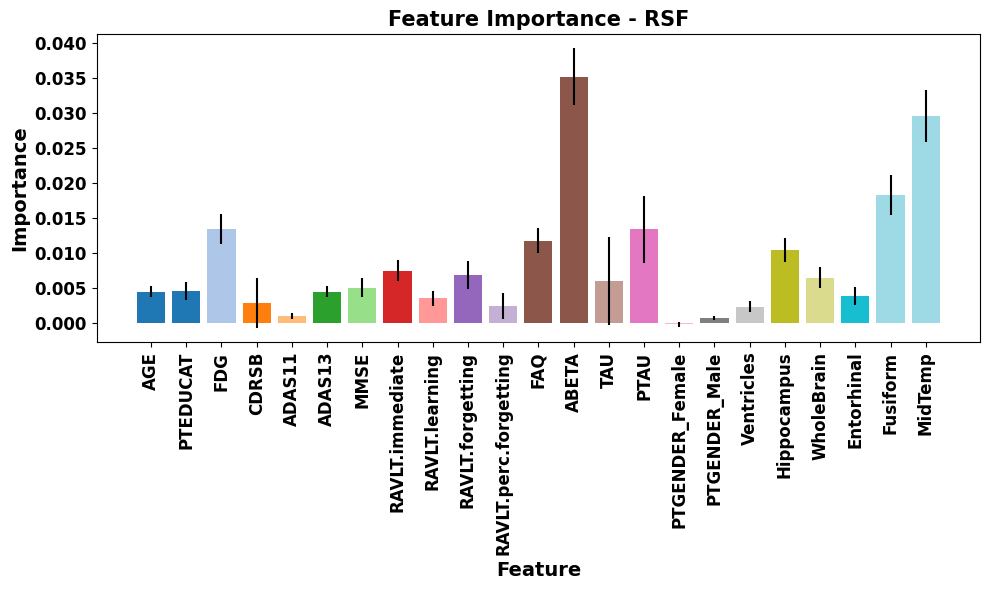

In [ ]:
# Calculate permutation importance
r = permutation_importance(rsf, X_test, y_test, n_repeats=10, random_state=0)

# Define a color palette for the bars
colors = plt.cm.tab20(np.linspace(0, 1, len(r.importances_mean)))

# Plot the feature importances
plt.figure(figsize=(10, 6))
for i in range(len(r.importances_mean)):
    print(f"{x.columns[i]:<15}{r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")
    plt.bar(x.columns[i], r.importances_mean[i], yerr=r.importances_std[i], align='center', color=colors[i])

# Customize the plot aesthetics
plt.title('Feature Importance - RSF', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Feature', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Importance', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.tight_layout()

# Show plot
plt.show()

AGE            0.004 +/- 0.001
PTEDUCAT       0.005 +/- 0.001
FDG            0.013 +/- 0.002
CDRSB          0.003 +/- 0.004
ADAS11         0.001 +/- 0.000
ADAS13         0.004 +/- 0.001
MMSE           0.005 +/- 0.001
RAVLT.immediate0.007 +/- 0.002
RAVLT.learning 0.004 +/- 0.001
RAVLT.forgetting0.007 +/- 0.002
RAVLT.perc.forgetting0.002 +/- 0.002
FAQ            0.012 +/- 0.002
ABETA          0.035 +/- 0.004
TAU            0.006 +/- 0.006
PTAU           0.013 +/- 0.005
PTGENDER_Female-0.000 +/- 0.000
PTGENDER_Male  0.001 +/- 0.000
Ventricles     0.002 +/- 0.001
Hippocampus    0.010 +/- 0.002
WholeBrain     0.006 +/- 0.002
Entorhinal     0.004 +/- 0.001
Fusiform       0.018 +/- 0.003
MidTemp        0.030 +/- 0.004


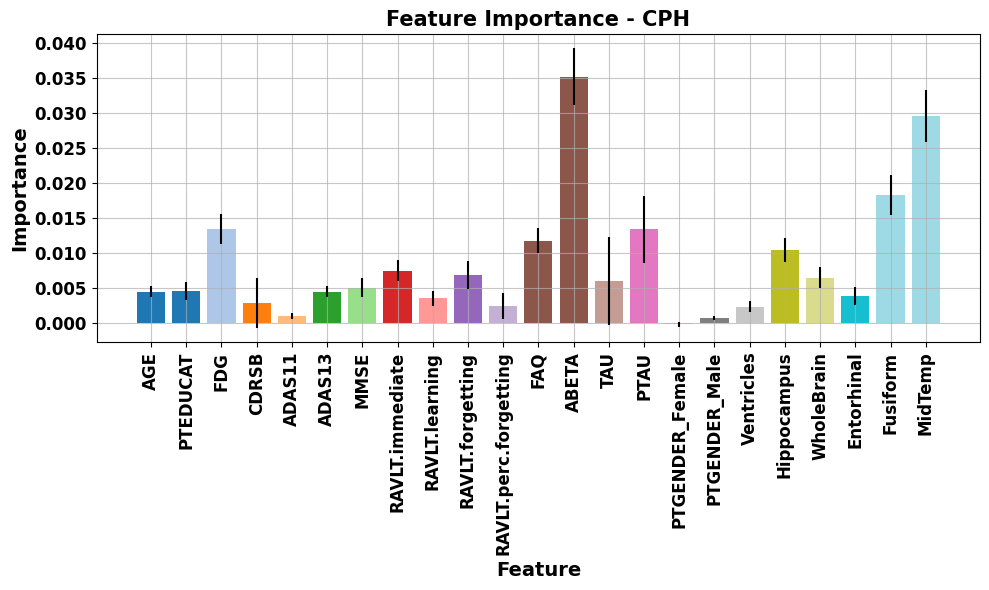

In [ ]:
# Calculate permutation importance
r = permutation_importance(rsf, X_test, y_test, n_repeats=10, random_state=0)

# Define a color palette for the bars
colors = plt.cm.tab20(np.linspace(0, 1, len(r.importances_mean)))

# Plot the feature importances
plt.figure(figsize=(10, 6))
for i in range(len(r.importances_mean)):
    print(f"{x.columns[i]:<15}{r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")
    plt.bar(x.columns[i], r.importances_mean[i], yerr=r.importances_std[i], align='center', color=colors[i])

# Customize the plot aesthetics
plt.title('Feature Importance - CPH', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Feature', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Importance', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

AGE            0.003 +/- 0.002
PTEDUCAT       0.052 +/- 0.008
FDG            0.053 +/- 0.006
CDRSB          0.005 +/- 0.005
ADAS11         0.016 +/- 0.005
ADAS13         0.002 +/- 0.005
MMSE           0.063 +/- 0.015
RAVLT.immediate0.021 +/- 0.006
RAVLT.learning 0.004 +/- 0.001
RAVLT.forgetting0.108 +/- 0.018
RAVLT.perc.forgetting0.251 +/- 0.022
FAQ            0.058 +/- 0.007
ABETA          0.057 +/- 0.009
TAU            0.108 +/- 0.021
PTAU           0.271 +/- 0.031
PTGENDER_Female0.006 +/- 0.002
PTGENDER_Male  0.005 +/- 0.002
Ventricles     -0.000 +/- 0.001
Hippocampus    0.000 +/- 0.000
WholeBrain     0.030 +/- 0.007
Entorhinal     0.000 +/- 0.000
Fusiform       0.000 +/- 0.000
MidTemp        0.000 +/- 0.000


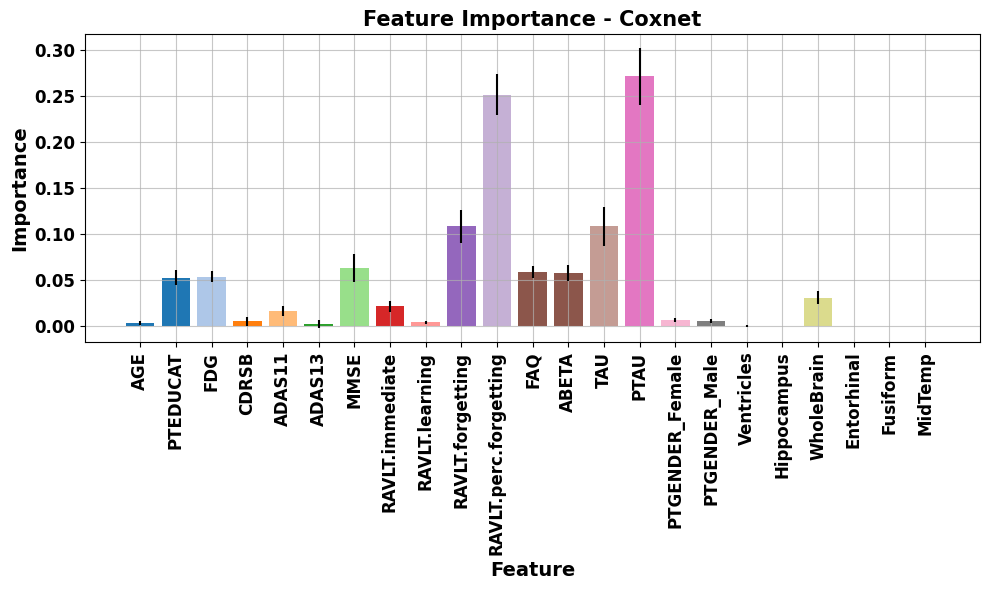

In [ ]:
# Calculate permutation importance
r = permutation_importance(estimator, X_test, y_test, n_repeats=10, random_state=0)

# Define a color palette for the bars
colors = plt.cm.tab20(np.linspace(0, 1, len(r.importances_mean)))

# Plot the feature importances
plt.figure(figsize=(10, 6))
for i in range(len(r.importances_mean)):
    print(f"{x.columns[i]:<15}{r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")
    plt.bar(x.columns[i], r.importances_mean[i], yerr=r.importances_std[i], align='center', color=colors[i])

# Customize the plot aesthetics
plt.title('Feature Importance - Coxnet', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Feature', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Importance', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

AGE            0.000 +/- 0.000
PTEDUCAT       0.000 +/- 0.000
FDG            0.000 +/- 0.000
CDRSB          0.000 +/- 0.000
ADAS11         0.010 +/- 0.003
ADAS13         0.019 +/- 0.006
MMSE           -0.002 +/- 0.005
RAVLT.immediate0.000 +/- 0.000
RAVLT.learning 0.000 +/- 0.000
RAVLT.forgetting0.000 +/- 0.000
RAVLT.perc.forgetting0.000 +/- 0.000
FAQ            0.009 +/- 0.001
ABETA          0.000 +/- 0.000
TAU            0.247 +/- 0.031
PTAU           0.012 +/- 0.015
PTGENDER_Female0.000 +/- 0.000
PTGENDER_Male  0.000 +/- 0.000
Ventricles     0.000 +/- 0.000
Hippocampus    0.061 +/- 0.014
WholeBrain     0.000 +/- 0.000
Entorhinal     0.000 +/- 0.000
Fusiform       0.002 +/- 0.001
MidTemp        0.000 +/- 0.000


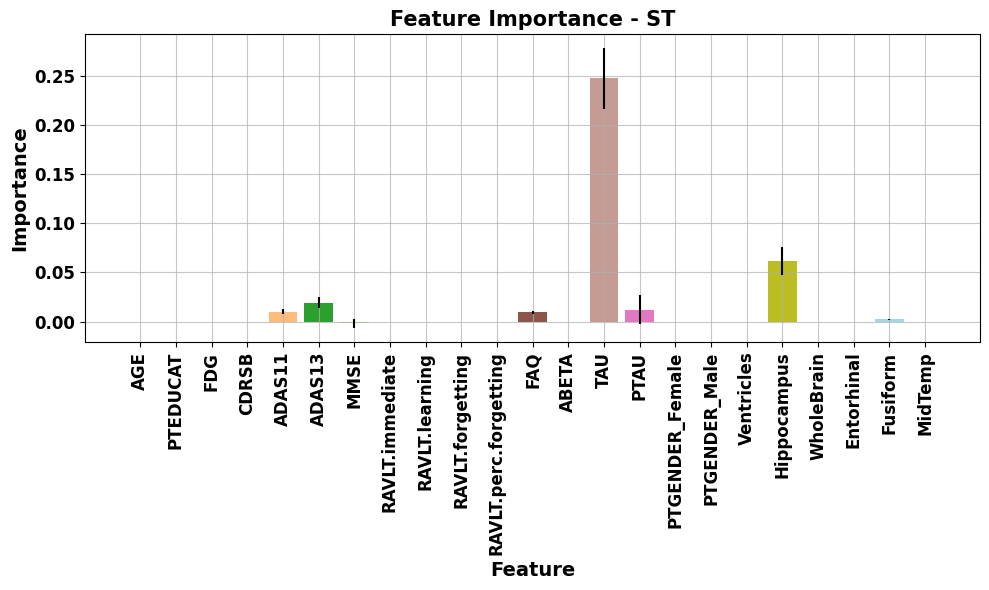

In [ ]:
# Calculate permutation importance
r = permutation_importance(sv, X_test, y_test, n_repeats=10, random_state=0)

# Define a color palette for the bars
colors = plt.cm.tab20(np.linspace(0, 1, len(r.importances_mean)))

# Plot the feature importances
plt.figure(figsize=(10, 6))
for i in range(len(r.importances_mean)):
    print(f"{x.columns[i]:<15}{r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")
    plt.bar(x.columns[i], r.importances_mean[i], yerr=r.importances_std[i], align='center', color=colors[i])

# Customize the plot aesthetics
plt.title('Feature Importance - ST', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Feature', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Importance', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

AGE            0.002 +/- 0.002
PTEDUCAT       0.007 +/- 0.003
FDG            0.006 +/- 0.003
CDRSB          -0.004 +/- 0.004
ADAS11         0.002 +/- 0.002
ADAS13         0.001 +/- 0.003
MMSE           0.005 +/- 0.002
RAVLT.immediate0.005 +/- 0.002
RAVLT.learning -0.001 +/- 0.002
RAVLT.forgetting0.001 +/- 0.002
RAVLT.perc.forgetting-0.002 +/- 0.004
FAQ            0.003 +/- 0.002
ABETA          0.027 +/- 0.007
TAU            0.001 +/- 0.002
PTAU           0.000 +/- 0.003
PTGENDER_Female0.003 +/- 0.001
PTGENDER_Male  0.002 +/- 0.002
Ventricles     0.004 +/- 0.002
Hippocampus    0.000 +/- 0.003
WholeBrain     0.007 +/- 0.003
Entorhinal     0.001 +/- 0.001
Fusiform       0.002 +/- 0.001
MidTemp        0.010 +/- 0.003


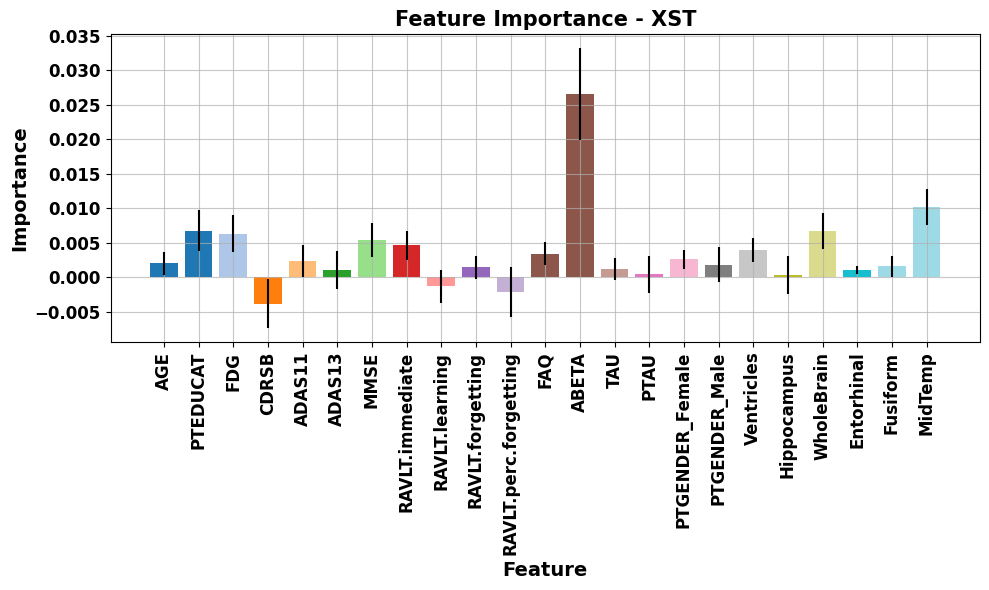

In [ ]:
# Calculate permutation importance
r = permutation_importance(extrast, X_test, y_test, n_repeats=10, random_state=0)

# Define a color palette for the bars
colors = plt.cm.tab20(np.linspace(0, 1, len(r.importances_mean)))

# Plot the feature importances
plt.figure(figsize=(10, 6))
for i in range(len(r.importances_mean)):
    print(f"{x.columns[i]:<15}{r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")
    plt.bar(x.columns[i], r.importances_mean[i], yerr=r.importances_std[i], align='center', color=colors[i])

# Customize the plot aesthetics
plt.title('Feature Importance - XST', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Feature', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Importance', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

AGE            0.033 +/- 0.008
PTEDUCAT       0.000 +/- 0.000
FDG            0.026 +/- 0.007
CDRSB          0.101 +/- 0.013
ADAS11         -0.000 +/- 0.001
ADAS13         0.000 +/- 0.000
MMSE           0.000 +/- 0.000
RAVLT.immediate-0.000 +/- 0.004
RAVLT.learning 0.000 +/- 0.000
RAVLT.forgetting0.000 +/- 0.000
RAVLT.perc.forgetting0.043 +/- 0.006
FAQ            0.000 +/- 0.000
ABETA          0.219 +/- 0.018
TAU            0.000 +/- 0.000
PTAU           -0.003 +/- 0.001
PTGENDER_Female0.000 +/- 0.000
PTGENDER_Male  0.000 +/- 0.000
Ventricles     0.001 +/- 0.002
Hippocampus    0.105 +/- 0.017
WholeBrain     0.006 +/- 0.003
Entorhinal     0.118 +/- 0.019
Fusiform       0.000 +/- 0.000
MidTemp        0.004 +/- 0.003


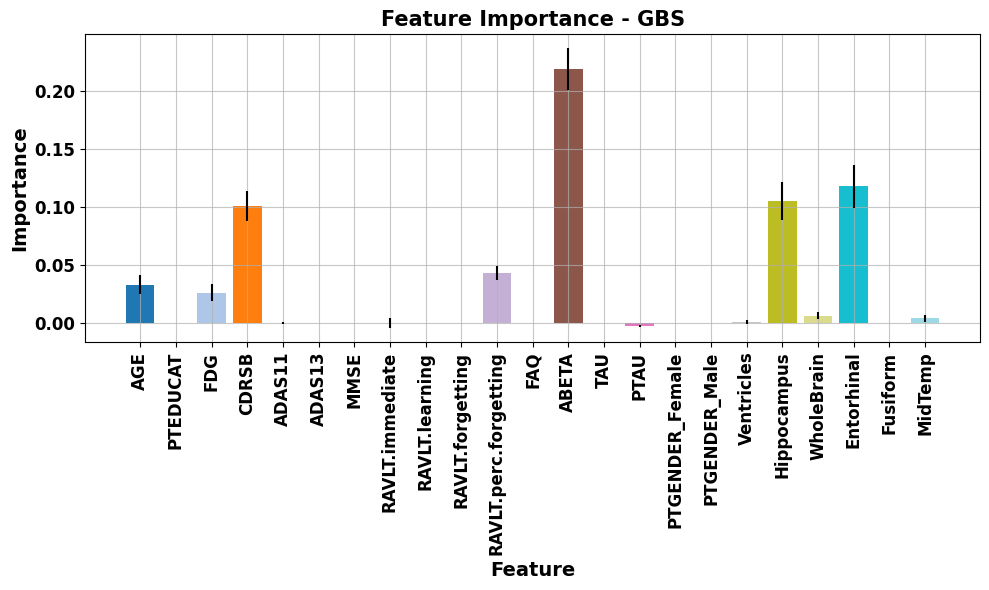

In [ ]:
# Calculate permutation importance
r = permutation_importance(GBS, X_test, y_test, n_repeats=10, random_state=0)

# Define a color palette for the bars
colors = plt.cm.tab20(np.linspace(0, 1, len(r.importances_mean)))

# Plot the feature importances
plt.figure(figsize=(10, 6))
for i in range(len(r.importances_mean)):
    print(f"{x.columns[i]:<15}{r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")
    plt.bar(x.columns[i], r.importances_mean[i], yerr=r.importances_std[i], align='center', color=colors[i])

# Customize the plot aesthetics
plt.title('Feature Importance - GBS', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Feature', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Importance', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

AGE            0.019 +/- 0.004
PTEDUCAT       0.086 +/- 0.010
FDG            0.070 +/- 0.006
CDRSB          0.014 +/- 0.004
ADAS11         0.005 +/- 0.001
ADAS13         0.008 +/- 0.004
MMSE           0.051 +/- 0.014
RAVLT.immediate0.020 +/- 0.005
RAVLT.learning 0.008 +/- 0.003
RAVLT.forgetting0.131 +/- 0.018
RAVLT.perc.forgetting0.276 +/- 0.025
FAQ            0.074 +/- 0.007
ABETA          0.061 +/- 0.006
TAU            0.131 +/- 0.022
PTAU           0.292 +/- 0.030
PTGENDER_Female0.003 +/- 0.002
PTGENDER_Male  0.003 +/- 0.002
Ventricles     0.031 +/- 0.007
Hippocampus    0.009 +/- 0.002
WholeBrain     0.075 +/- 0.013
Entorhinal     0.006 +/- 0.001
Fusiform       0.006 +/- 0.001
MidTemp        0.022 +/- 0.004


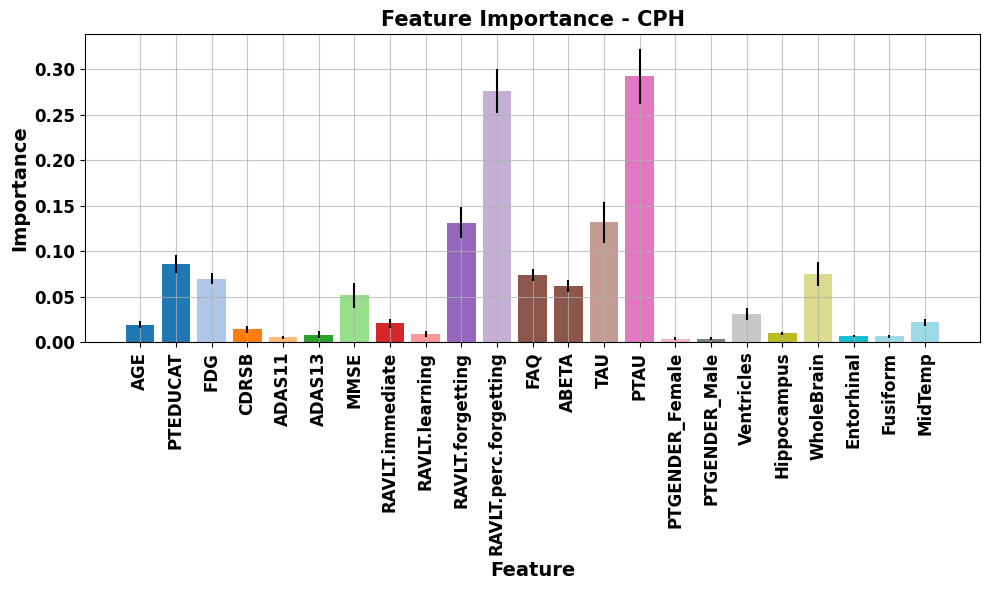

In [ ]:
# Calculate permutation importance
r = permutation_importance(CPH, X_test, y_test, n_repeats=10, random_state=0)

# Define a color palette for the bars
colors = plt.cm.tab20(np.linspace(0, 1, len(r.importances_mean)))

# Plot the feature importances
plt.figure(figsize=(10, 6))
for i in range(len(r.importances_mean)):
    print(f"{x.columns[i]:<15}{r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")
    plt.bar(x.columns[i], r.importances_mean[i], yerr=r.importances_std[i], align='center', color=colors[i])

# Customize the plot aesthetics
plt.title('Feature Importance - CPH', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Feature', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Importance', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(True, linestyle='-', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

AGE            0.002 +/- 0.002
PTEDUCAT       0.007 +/- 0.003
FDG            0.006 +/- 0.003
CDRSB          -0.004 +/- 0.004
ADAS11         0.002 +/- 0.002
ADAS13         0.001 +/- 0.003
MMSE           0.005 +/- 0.002
RAVLT.immediate0.005 +/- 0.002
RAVLT.learning -0.001 +/- 0.002
RAVLT.forgetting0.001 +/- 0.002
RAVLT.perc.forgetting-0.002 +/- 0.004
FAQ            0.003 +/- 0.002
ABETA          0.027 +/- 0.007
TAU            0.001 +/- 0.002
PTAU           0.000 +/- 0.003
PTGENDER_Female0.003 +/- 0.001
PTGENDER_Male  0.002 +/- 0.002
Ventricles     0.004 +/- 0.002
Hippocampus    0.000 +/- 0.003
WholeBrain     0.007 +/- 0.003
Entorhinal     0.001 +/- 0.001
Fusiform       0.002 +/- 0.001
MidTemp        0.010 +/- 0.003


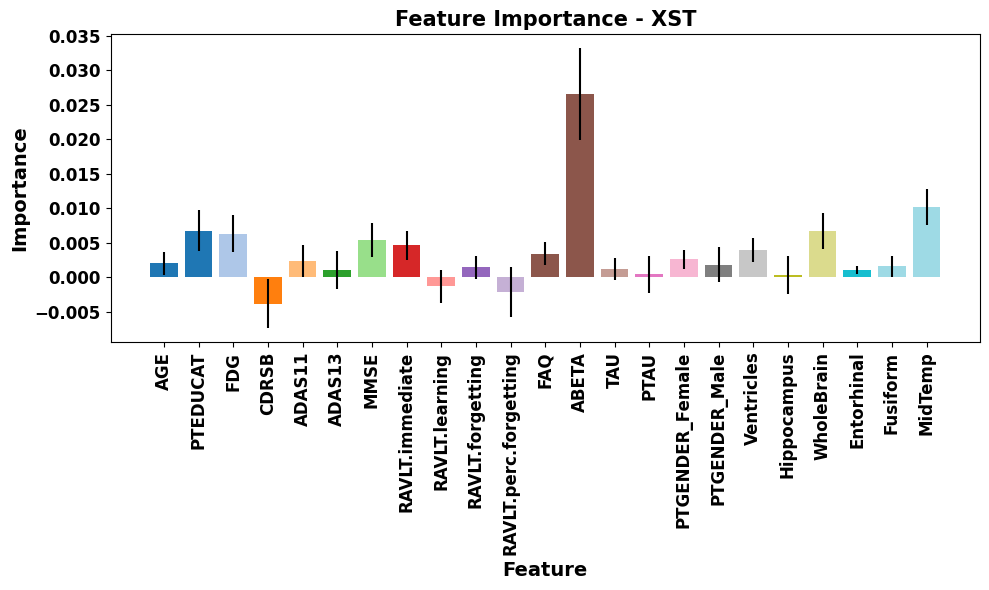

In [ ]:
# Calculate permutation importance
r = permutation_importance(extrast, X_test, y_test, n_repeats=10, random_state=0)

# Define a color palette for the bars
colors = plt.cm.tab20(np.linspace(0, 1, len(r.importances_mean)))

# Plot the feature importances
plt.figure(figsize=(10, 6))
for i in range(len(r.importances_mean)):
    print(f"{x.columns[i]:<15}{r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")
    plt.bar(x.columns[i], r.importances_mean[i], yerr=r.importances_std[i], align='center', color=colors[i])

# Customize the plot aesthetics
plt.title('Feature Importance - XST', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Feature', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Importance', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.tight_layout()

# Show plot
plt.show()